# Chapter 7 Moving Beyond Linearity
Linearity is almost always an approximation, need more flexible models.

## Polynomial Regression 
+ Extend linear model with polynomial terms (e.g. $X^2, X^3, \ldots$).
+ It's still a linear (in parameter) model but can model non-linear data.
+ Usually don't use polynomial terms higher than degree 3 or 4.



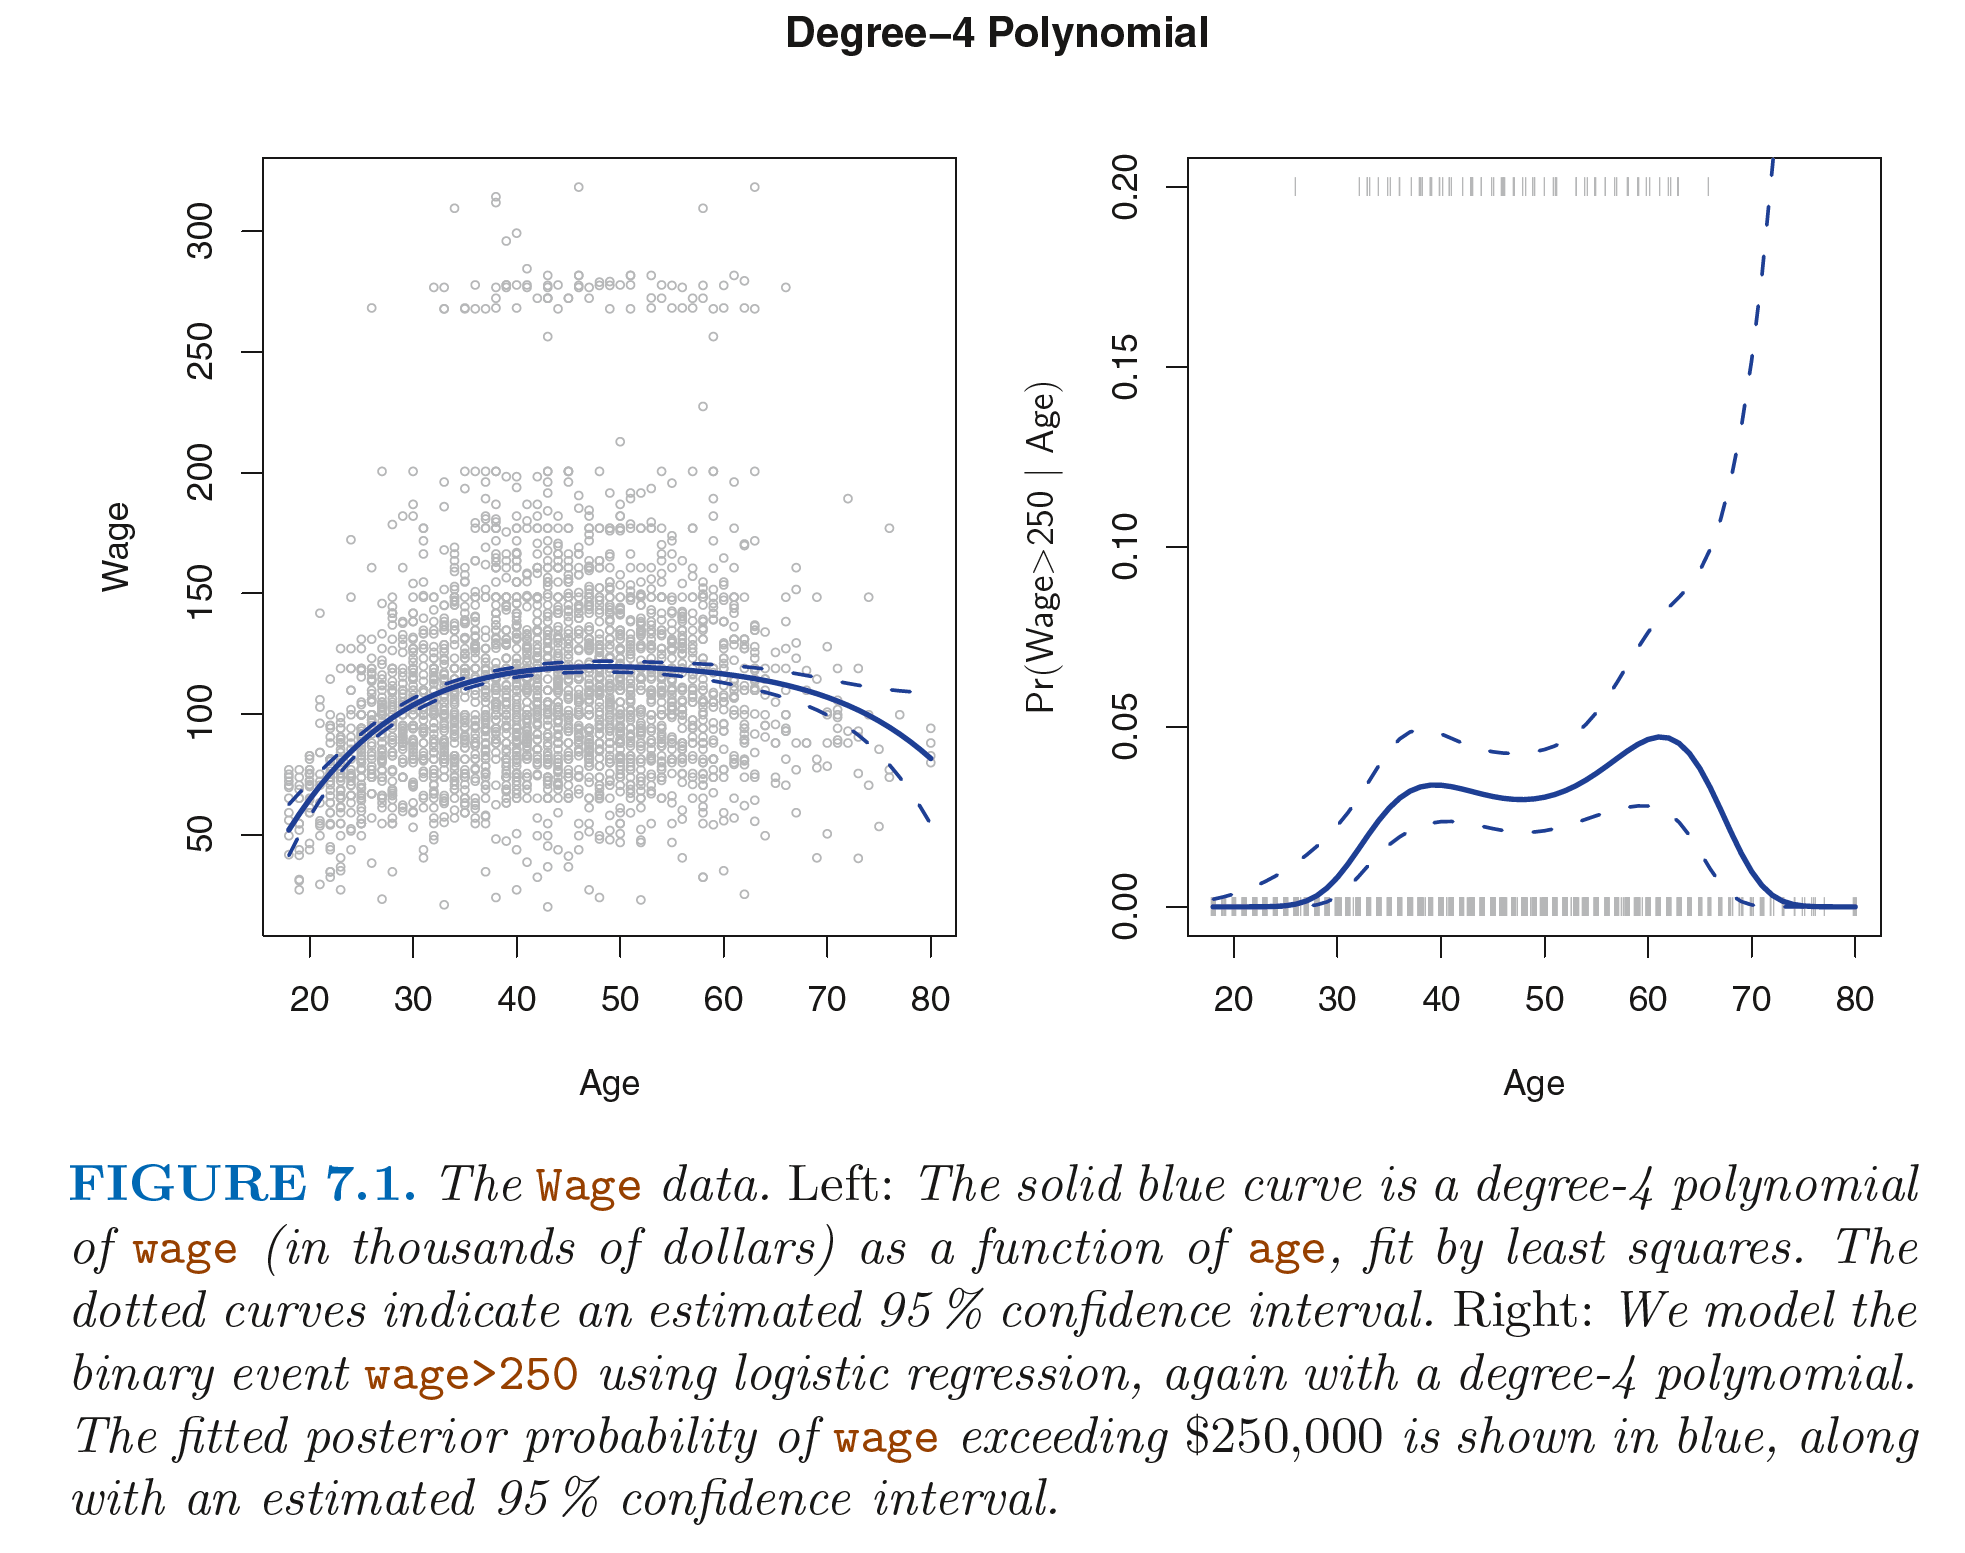

In [ ]:
## 多项式回归用多项式项扩展线性模型(例如𝑋2，𝑋3，…)它仍然是一个线性(参数)模型，但可以模拟非线性数据。
from IPython.display import Image
Image('D:/ukm.ppt/机器学习/week4/images/pw52.png', width =700)

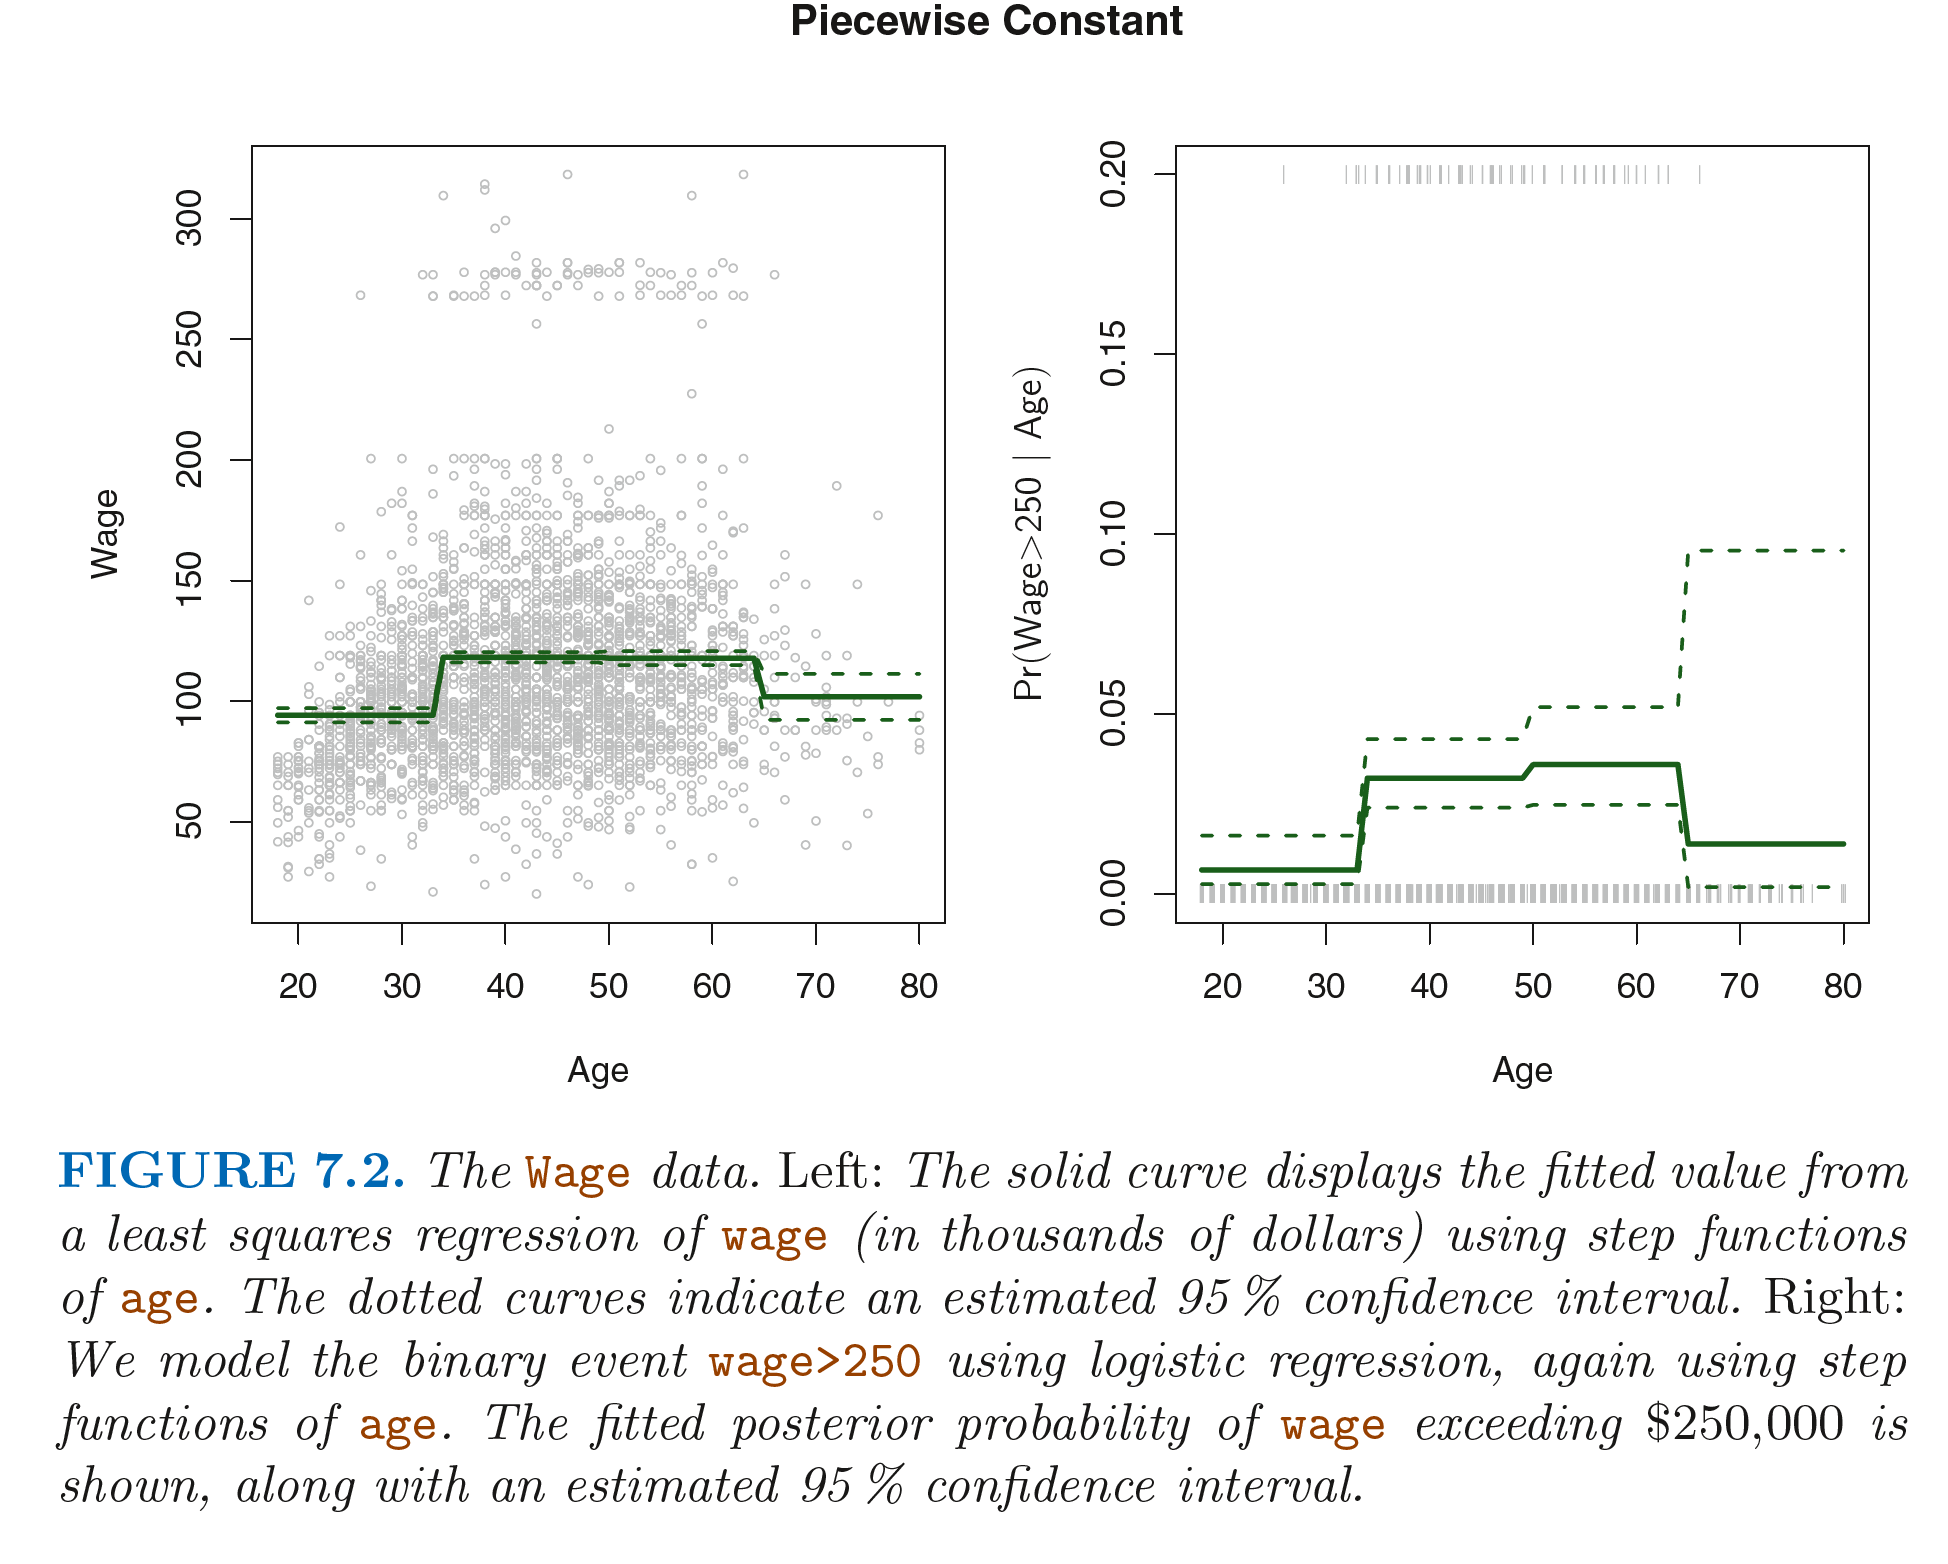

In [ ]:
Image('D:/ukm.ppt/机器学习/week4/images/pw53.png', width =700)

In [1]:
# 置信区间：对未知参数的可信程度
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

%matplotlib inline

Let explore how to generate the `Wage` dataset models:

In [ ]:
df = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/wage.csv')
df.head(3)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


+ We first fit the polynomial regression model using the following commands:

In [ ]:
## 多项式特征生成器
X1 = PolynomialFeatures(1).fit_transform(df.age.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(df.age.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(df.age.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(df.age.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(df.age.values.reshape(-1,1))

# PolynomialFeatures(degree=d)会生成一个多项式特征生成器，degree=d表示生成的多项式的最高次数
# degree=2时，生成的多项式特征就是[1, a, b, a^2, ab, b^2]
# df.age.values.reshape(-1,1)是将数据框df中的age列转换为一个二维数组
# fit_transform函数则是先拟合数据，然后转换它

+ This syntax fits a linear model, using the `PolynomialFeatures()` function, in order to predict wage using up to a fourth-degree polynomial in `age`.
+ The `PolynomialFeatures()` command allows us to avoid having to write out a long formula with powers
of `age`.
+ We can then fit our linear model:

In [ ]:
fit2 = sm.GLS(df.wage, X4).fit() #广义最小二乘法
fit2.summary().tables[1]
# .tables[1]：从模型摘要中提取表格，包含了模型系数的详细统计信息

#ols：普通最小二乘法，目标是最小化残差平方和，主要假设：线性关系、同方差性、无自相关性、误差项的期望值为0
#glm：广义最小二乘法，用于当ols的基本假设不成立时，数据存在异方差性或误差项相关性，引入一个权重矩阵调整误差项的异方差性或自相关性

#一个小的P值（通常小于0.05）表明我们有足够的证据拒绝零假设，即自变量的影响显著非零。

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


+ Next, consider the task of predicting whether an individual earns more than \$250,000 per year.
+ First, create the appropriate response vector, and then fit a logistic model using the `GLM()` function from `statsmodels`:

In [ ]:
# Create response matrix，创建二元相应变量
y = (df.wage > 250).map({False:0, True:1}).to_numpy()
#.map({False:0, True:1})：将 True/False 值映射为1和0。

# Fit logistic model，用广义线性模型
clf = sm.GLM(y, X4, family=sm.families.Binomial(sm.families.links.logit()))
res = clf.fit()

# family=sm.families.Binomial(sm.families.links.logit())：指定了模型的家族为二项分布，链接函数为逻辑函数（logit）
# 在逻辑回归中，链接函数将线性预测器的输出映射到0和1之间，适合二分类问题。

D:\Anaconda\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


+ Create a grid of values for `age` at which we want predictions, and then call the generic `predict()` function for each model:

In [ ]:
# Generate a sequence of age values spanning the range
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)
#使用 numpy 的 arange 函数创建一个从数据集中年龄的最小值到最大值的序列。这个序列默认每次增加1岁。

# Generate test data
X_test = PolynomialFeatures(4).fit_transform(age_grid)
# fit_transform(age_grid)：对生成的年龄序列 age_grid 应用多项式转换。
# 结果 X_test 包含了原始年龄值及其高次幂的项，用于在模型中作为预测变量。

# Predict the value of the generated ages
pred1 = fit2.predict(X_test) # salary
pred2 = res.predict(X_test)  # Pr(wage>250)

+ Finally, plot the data and add the fit from the degree-4 polynomial.

Text(0, 0.5, 'Pr(wage>250|age)')

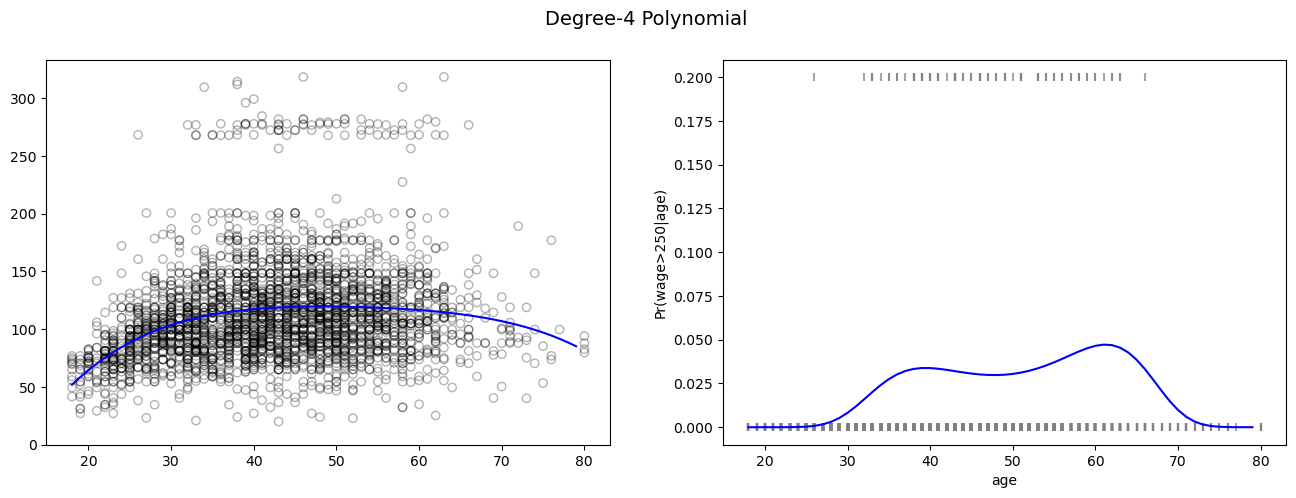

In [ ]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5)) #创建一个图形对象 fig 和两个子图轴对象 ax1 和 ax2
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, pred1, color = 'b')
ax1.set_ylim(ymin=0) #设置y轴的最小值为0

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(age_grid, pred2, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)')

### Deciding on a degree 

+ In performing a polynomial regression we must decide on the degree of the polynomial to use. One way to do this is by using hypothesis tests.
+ Now fit models ranging from linear to a degree-5 polynomial and  determine the simplest model which is sufficient to explain the relationship between `wage` and `age`.
+ Do this using the `anova_lm()` function, which performs an analysis of variance (ANOVA, using an F-test) in order to test the null hypothesis that a model $M_1$ is sufficient to explain the data against the  alternative hypothesis that a more complex model $M_2$ is required.
+ In order to use the `anova_lm()` function, $M_1$ and $M_2$ must be **nested models**: the predictors in $M_1$ must be a subset of the predictors in $M_2$.
+ In this case, we fit five different models and sequentially compare the simpler model to the more complex model
(*Note:* you may get an *invalid value* Runtime Warning on the first model, because there is no "simpler model" to compare to):

In [ ]:
fit_1 = fit = sm.GLS(df.wage, X1).fit()
fit_2 = fit = sm.GLS(df.wage, X2).fit()
fit_3 = fit = sm.GLS(df.wage, X3).fit()
fit_4 = fit = sm.GLS(df.wage, X4).fit()
fit_5 = fit = sm.GLS(df.wage, X5).fit()

print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1))

# anova_lm 是用于比较两个或更多拟合模型的线性回归模型的方差分析
# typ=1 指定了ANOVA的类型为 "Type 1"，这种类型的ANOVA逐步考虑每个模型的变量，并评估每个额外变量的加入对模型改善的显著性。

# srr：残差平方和，越小越好
# df_diff自由度差异，相比前一个模型增加了多少参数
# ss_diff： 平方和的差异，相邻两个模型之间残差平方和的差异
# F：F统计量越高，新增参数对模型的改善越明显
# P值小于0.05，则认为新增参数显著改善了模型。

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


+ The $p$-value comparing the linear Model 1 to the quadratic Model 2 is essentially zero $(<10^{-32})$, indicating that a linear fit is not sufficient.
+ Similarly the $p$-value comparing the quadratic Model 2 to the cubic Model 3 is very low (0.0017), so the quadratic fit is also insufficient.
+ The $p$-value comparing the cubic and degree-4 polynomials, Model 3 and Model 4, is approximately 0.05 while the degree-5 polynomial Model 5 seems unnecessary because its $p$-value is 0.37.
+ Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified.

## Step Functions
+ Also known as piecewise constant regression.
+ Cut $X$ into $K$ different regions and fit a constant to each region.
$$y_i = \beta_0 + \beta_1C_1(x_i) + \beta_2C_2(x_i) + \ldots + \beta_KC_K(x_i) + \epsilon _i$$
where
$$\begin{align*}
 C_0(X) &= I(X<c_1) \\
 C_1(X) &= I(c_1 \leq X < c_2) \\
 & \vdots \\
 C_{K-1}(X) &= I(c_{K-1} \leq X < c_K) \\
 C_{K}(X) &= I(X \geq c_K)
\end{align*}$$
+ The model reduces to $\hat{y} = \beta_0 + \beta_k$ where $k$ is the $k^\textrm{th}$ region.
+ $\beta_0$ is just the estimate for y (the mean) in the region before the first cut point.
+ Can use same approach for logistic regression to get a flat probability estimate for each region.



### Example
+ In order to fit a step function, we use the `cut()` function:

In [ ]:
df_cut, bins = pd.cut(df.age, 4, retbins = True, right = True)
df_cut.value_counts(sort = False)

# pd.cut()：这是pandas库中用于将连续变量分割成离散区间的函数。
# 4：指定将数据分割成的区间数
# retbins=True：这个参数设为True表示函数将返回每个区间的边界值。
# right=True：这个参数设为True表示每个分割区间是右闭合的
# df_cut：存储了按照age列的值分割成的区间的结果。每个数据点都会被分配到一个具体的区间中。
# bins：存储了生成的区间的边界值。

# df_cut.value_counts()：这个方法用于统计df_cut中每个区间的观测值数量。
# sort=False：在显示结果时不按数量排序，而是按区间的顺序显示。

age
(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: count, dtype: int64

+ Here `cut()` automatically picked the cutpoints at 33.5, 49, and 64.5 years of age.
+ We could also have specified our own cutpoints directly.
+ Now let's create a set of dummy variables for use in the regression:

In [ ]:
df_steps = pd.concat([df.age, df_cut, df.wage], keys = ['age','age_cuts','wage'], axis = 1)
# pd.concat()用于合并多个pandas对象
# keys=['age', 'age_cuts', 'wage']：这些是合并后的列名称。

# Create dummy variables for the age groups，pd.get_dummies()：这个函数用于将分类变量转换为虚拟/指示器变量。
# 每一个分类（这里是age_cuts中的年龄区间），生成一个新的虚拟变量列，该列中如果原始数据属于对应的分类，则为1，否则为0。
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
# sm.add_constant() 在数据框中添加一个常数列（截距项）
df_steps_dummies = sm.add_constant(df_steps_dummies)

# Drop the (17.938, 33.5] category 通常在创建虚拟变量时需要将其中一个类别作为基准类别并从模型中排除。
df_steps_dummies = df_steps_dummies.drop(df_steps_dummies.columns[1], axis = 1)

df_steps_dummies.head(5)

,const,"(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1.0,False,False,False
1,1.0,False,False,False
2,1.0,True,False,False
3,1.0,True,False,False
4,1.0,False,True,False


+ Now to fit the models.
+ We dropped the `age<33.5` category, so the intercept coefficient can be interpreted as the average salary for those under 33.5 years of age.
+ The other coefficients can be interpreted as the average additional salary for those in the other age groups.

In [ ]:
fit3 = sm.GLM(df_steps.wage, df_steps_dummies.astype(int)).fit()
fit3.summary().tables[1]

# df_steps.wage：这是模型的因变量
# df_steps_dummies.astype(int)：这是模型的自变量（解释变量）
# astype(int) 确保所有虚拟变量都是整数类型
# tables[1]通常包含关于模型系数的详细信息

,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416


+ The intercept coefficient of 94,160 can be interpreted as the average salary for those under 33.5 years of age.
+ The other coefficients can be interpreted as the average additional salary for those in the other age groups.

D:\Anaconda\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


Text(0, 0.5, 'Pr(wage>250|age)')

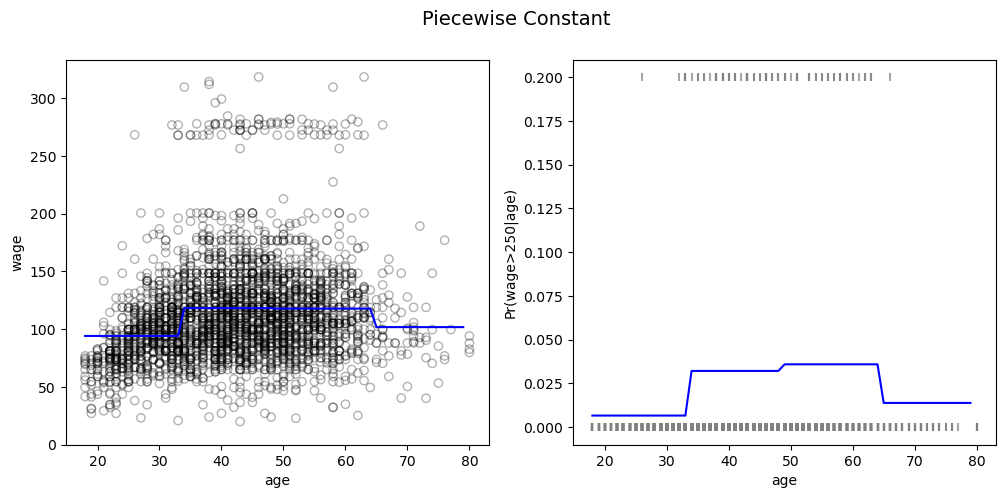

In [ ]:
# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(age_grid.ravel(), bins)
# ravel()用于将数组转换成一维形式。
# np.digitize()：这个函数用来将数据点分配到已经存在的箱子（bins）中

# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis = 1))
# pd.get_dummies(bin_mapping)：为测试数据中的每个年龄区间生成虚拟变量。
# .drop(1, axis=1)：删除第一个虚拟变量列以避免多重共线性。
# sm.add_constant()：添加常数项（截距）以用于回归分析。

# Predict the value of the generated ages using the linear model
pred2 = fit3.predict(X_test2)

# And the logistic model
clf2 = sm.GLM(y, df_steps_dummies.astype(int),
              family=sm.families.Binomial(sm.families.links.logit()))
res2 = clf2.fit()
pred3 = res2.predict(X_test2.astype(int))

# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Piecewise Constant', fontsize = 14)

# Scatter plot with polynomial regression line
ax1.scatter(df.age, df.wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
ax1.plot(age_grid, pred2, c = 'b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin = 0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(np.arange(df.age.min(), df.age.max()).reshape(-1,1), pred3, color = 'b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(df.age, y/5, s = 30, c = 'grey', marker = '|', alpha = 0.7)

ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)')

## Basis functions 

+ Polynomial terms and step function are both types of basis functions.
+ A basis function, $b_k(X)$, is a function that transforms $X$.
$$y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + \ldots + \beta_Kb_K(x_i) + \epsilon _i$$
+ For polynomial regression, this is simply raising $X$ to a power and for step functions this is transforming $X$ into 0 or 1 based on whether $X$ is in a region or not (indicator variable).
+ Wavelets and fourier series are also basis functions.


## Regression Splines 
+ Combining piecewise constant regression and polynomial regression

### Piecewise polynomials
+ Fit separate low degree polynomials over different regions of $X$.
+ It works by fitting a cubic regression model
$$y_i = \beta_0 + \beta_1 x_i + \beta_2x_i^2 + \beta_3 x_i^3 + \epsilon_i$$
where the coefficients differ in different parts of the range $X$.
+ The place where the coefficients change are called knots.
+ The polynomials are contrained so that they join smoothly at the knots.
+ Example of piecewise cubic polynomial with as single knot at point $c$:
$$y_i = \begin{cases}
\beta_{01} + \beta_{11} x_i + \beta_{21}x_i^2 + \beta_{31} x_i^3 + \epsilon_i & \textrm{if }x_i<c\\
\beta_{02} + \beta_{12} x_i + \beta_{22}x_i^2 + \beta_{32} x_i^3 + \epsilon_i & \textrm{if }x_i\geq c
\end{cases}$$





### Splines 
+ Piecewise polynomials with constraints that the curves be continuous and smooth - meaning both first and second derivatives must match at the knot.
+ Fitting a spline turns out to be surprisingly simpler than it seems.
+ We don't have to fit a 3 degree polynomial for each region.
+ By smartly choosing basis functions, we can use least squares to solve for all the coefficients.
+ We use the truncated power basis function which is
$$h(x, \xi) = \begin{cases}
(x -\xi)^3, & x > \xi \\
0 & \textrm{otherwise}
\end{cases}$$
where $\xi$ is a knot.

+ The equation to send to least squares is
$$\hat{y} = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 +  b_1h(x, \xi_1) + \ldots + b_Kh(x, \xi_K)$$ where we have $K$ truncated power transformations for a total of $K + 3$ predictors.

### How to choose K?
+ The regression spline is most flexible in regions that contain a lot of knots, because in those regions the polynomial coefficients can change rapidly.
+ It is common to place knots in a uniform fashion.
+ One way to do this is to specify the desired d.o.f., and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.
+ Cross validation:
    + remove a portion of the data (say 10 %),
    + fit a spline with a certain number of knots to the remaining data,
    + use the spline to make predictions for the held-out portion.
    + repeat this multiple times until each observation has been left out once, and compute the overall cross-validated RSS.
    + repeated for different numbers of knots K.
    + the value of K giving the smallest RSS is chosen.
    
### Splines vs polynomial regression
+ Splines generally do better.
+ A complex fit can still be fit well with a 3 degree spline by placing more knots.
+ It could take a very high degree polynomial to do the same and with worse variance.

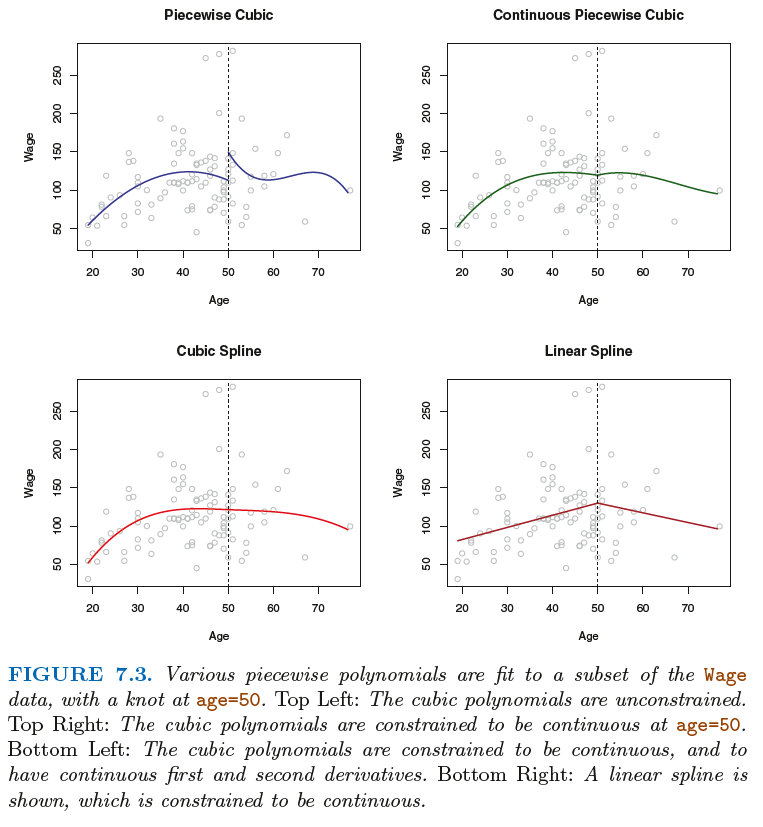

In [ ]:
Image('D:/ukm.ppt/机器学习/week4/images/pw54.png', width =700)

## Smoothing splines
+ Finding a function that minimizes RSS but 'smooth'.
+ Smoothness here is defined as having a relatively stable second derivative.
+ We want to find the smoothing spline, $g$, that minimizes
$$\sum_{i=1}^n{(y_i - g(x_i))^2} + \lambda \int{g^{\prime \prime}(t)^2 dt}$$
+ The first term is a *loss function* that encourages g to fit the data well.
+ The second term is a penalty term that penalize the variability in $g$.
+ Larger tuning parameter,$\lambda$, will make $g$ smoother.
+ The function that minimizes this error is a natural cubic spline with knots at each unique value of x but with shrunken parameter estimates due to the penalty term.
+ The tuning (smoothing) parameter is very important to control variance. Choose smoothing parameter with CV.
+ Effective degrees of freedom, $df_\lambda$, is a measure of the flexibility of the smoothing spline (higher $df_\lambda$ -> more flexible(low bias, high variance)).



In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# Read in the data
df = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/wage.csv')

# Generate a sequence of age values spanning the range
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)

# np.arange() 函数用于生成一个等间隔的值序列。
# df.age.min() 是从数据框 df 中的 age 列获取的最小值，这将作为序列的起始值。

+ In order to fit regression splines in python, we use the ${\tt dmatrix}$ module from the ${\tt patsy}$ library.
+ Regression splines can be fit by constructing an appropriate matrix of basis functions.
+ The ${\tt bs()}$ function generates the entire matrix of basis functions for splines with the specified set of knots.  
+ Fitting ${\tt wage}$ to ${\tt age}$ using a regression spline is simple:

In [3]:
# Fitting  wage  to  age  using a regression spline 回归样条

from patsy import dmatrix

# Specifying 3 knots
transformed_x1 = dmatrix("bs(df.age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"df.age": df.age}, return_type='dataframe')

# dmatrix 是 patsy 库的一个函数，用于生成设计矩阵
# bs() 是 B样条的缩写，用于生成基于样条的变换。
# knots=(25,40,60) 指定了三个结点（或称为“knots”）在年龄为 25, 40 和 60 的位置。这些结点是样条函数变化形状的地方。
# degree=3 指明每个样条片段是三次多项式
# include_intercept=False 表示不在生成的设计矩阵中包含截距项。

# Build a regular linear model from the splines
fit1 = sm.GLM(df.wage, transformed_x1).fit()
fit1.params
# fit1.params 输出拟合模型的参数
# 每个 bs() 项后的数字（如3.980500, 44.630980等）表示对应的B-spline基函数的系数。这些系数告诉我们每个基函数对预测模型的贡献有多大。
# 系数的大小和符号（正或负）表明了相应年龄段变化对响应变量的影响程度和方向。

Intercept                                                               60.493714
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

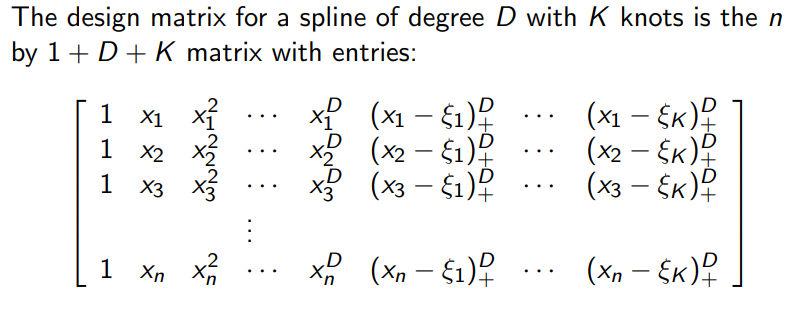

In [ ]:
Image('D:/ukm.ppt/机器学习/week4/images2/pw57.png', width =600)


+ Here we have prespecified knots at ages 25, 40, and 60.
+ This produces a spline with six basis functions. (Recall that a cubic spline with three knots has seven degrees of freedom; these degrees of freedom are used up by an intercept, plus six basis functions.)
+ We could also use the ${\tt df}$ option to produce a spline with knots at uniform quantiles of the data:

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1594.0
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Tue, 07 May 2024   Deviance:                   4.7708e+06
Time:                        11:22:29   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09006
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               60.4937      9.460      6.394      0.000      41.952      79.036
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.9805     12.538      0.317      0.751     -20.593      28.554
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.6310      9.626      4.636      0.000      25.764      63.498
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.8388     10.755      5.843      0.000      41.759      83.919
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.9908     10.706      5.230      0.000      35.007      76.975
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.6881     14.402      3.520      0.000      22.461      78.915
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.6061     19.126      0.868      0.385     -20.881      54.093
========================================================================================================================================
"""

In [ ]:
# Use the df  option to produce a spline with knots at uniform quantiles of the data:
# Specifying 6 degrees of freedom

transformed_x2 = dmatrix("bs(df.age, df=6, include_intercept=False)", #df=6 指定了设计矩阵的自由度为6。
                        {"df.age": df.age}, return_type='dataframe')
fit2 = sm.GLM(df.wage, transformed_x2).fit()
fit2.params # fit1.params 输出拟合模型的参数

Intercept                                       56.313841
bs(df.age, df=6, include_intercept=False)[0]    27.824002
bs(df.age, df=6, include_intercept=False)[1]    54.062546
bs(df.age, df=6, include_intercept=False)[2]    65.828391
bs(df.age, df=6, include_intercept=False)[3]    55.812734
bs(df.age, df=6, include_intercept=False)[4]    72.131473
bs(df.age, df=6, include_intercept=False)[5]    14.750876
dtype: float64

In [ ]:
transformed_x2.head(10)

,Intercept,"bs(df.age, df=6, include_intercept=False)[0]","bs(df.age, df=6, include_intercept=False)[1]","bs(df.age, df=6, include_intercept=False)[2]","bs(df.age, df=6, include_intercept=False)[3]","bs(df.age, df=6, include_intercept=False)[4]","bs(df.age, df=6, include_intercept=False)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.537145,0.208308,0.017316,0.000000,0.000000,0.000000
2,1.0,0.000000,0.042161,0.751086,0.204676,0.002078,0.000000
3,1.0,0.000000,0.099937,0.780172,0.119815,0.000077,0.000000
4,1.0,0.000000,0.000195,0.529332,0.431076,0.039397,0.000000
5,1.0,0.000000,0.000000,0.344847,0.525756,0.128290,0.001107
6,1.0,0.000000,0.066950,0.772273,0.160162,0.000616,0.000000
7,1.0,0.324371,0.523603,0.138528,0.000000,0.000000,0.000000
8,1.0,0.000210,0.194417,0.747475,0.057897,0.000000,0.000000
9,1.0,0.000000,0.000000,0.430706,0.492480,0.076774,0.000041


In [ ]:
fit2.summary()
# 除最后一个基函数外，其他基函数在统计上显著地与工资相关联，表明年龄对工资的影响在这些区间内是显著的。

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1592.5
Method:                          IRLS   Log-Likelihood:                -15313.
Date:                Tue, 07 May 2024   Deviance:                   4.7662e+06
Time:                        11:22:37   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09101
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       56.3138      7.258      7.759      0.000      42.088      70.539
bs(df.age, df=6, include_intercept=False)[0]    27.8240     12.435      2.238      0.025       3.453      52.195
bs(df.age, df=6, include_intercept=False)[1]    54.0625      7.127      7.585      0.000      40.093      68.032
bs(df.age, df=6, include_intercept=False)[2]    65.8284      8.323      7.909      0.000      49.515      82.142
bs(df.age, df=6, include_intercept=False)[3]    55.8127      8.724      6.398      0.000      38.714      72.911
bs(df.age, df=6, include_intercept=False)[4]    72.1315     13.745      5.248      0.000      45.192      99.071
bs(df.age, df=6, include_intercept=False)[5]    14.7509     16.209      0.910      0.363     -17.018      46.519
================================================================================================================
"""

+ In this case python chooses knots which correspond to the 25th, 50th, and 75th percentiles of ${\tt age}$.
+ The function ${\tt bs()}$ also has a ${\tt degree}$ argument, so we can fit splines of any degree, rather than the
default degree of 3 (which yields a cubic spline).

+ In order to instead fit a natural spline, we use the ${\tt cr()}$ function.
+ Here we fit a natural spline with four degrees of freedom:

In [ ]:
# To fit a natural spline, we use the  𝚌𝚛() function.
# Specifying 4 degrees of freedom

transformed_x3 = dmatrix("cr(df.age, df=4)", {"df.age": df.age}, return_type='dataframe')
fit3 = sm.GLM(df.wage, transformed_x3).fit()
fit3.params

# cr() 函数是 patsy 中用于生成自然立方样条变换的函数。
# df=4 指定了模型的自由度

Intercept              79.642095
cr(df.age, df=4)[0]   -14.667784
cr(df.age, df=4)[1]    36.811142
cr(df.age, df=4)[2]    35.934874
cr(df.age, df=4)[3]    21.563863
dtype: float64

In [ ]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          1596.4
Method:                          IRLS   Log-Likelihood:                -15318.
Date:                Tue, 07 May 2024   Deviance:                   4.7827e+06
Time:                        11:22:42   Pearson chi2:                 4.78e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08766
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              79.6421      1.773     44.918      0.000      76.167      83.117
cr(df.age, df=4)[0]   -14.6678      3.436     -4.269      0.000     -21.402      -7.934
cr(df.age, df=4)[1]    36.8111      1.950     18.881      0.000      32.990      40.632
cr(df.age, df=4)[2]    35.9349      2.056     17.476      0.000      31.905      39.965
cr(df.age, df=4)[3]    21.5639      6.989      3.085      0.002       7.865      35.263
=======================================================================================
"""

+ As with the ${\tt bs()}$ function, we could instead specify the knots directly using the ${\tt knots}$ option.

+ Let's see how these three models stack up:

Text(0, 0.5, 'wage')

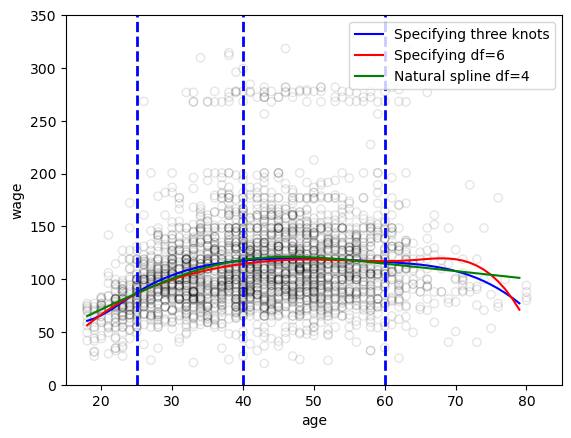

In [ ]:
# Generate a sequence of age values spanning the range
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(age_grid, df=6, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
pred3 = fit3.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred1, color='b', label='Specifying three knots')
plt.plot(age_grid, pred2, color='r', label='Specifying df=6')
plt.plot(age_grid, pred3, color='g', label='Natural spline df=4')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
# plt.vlines() 用于在图表上绘制垂直线。
# i：是 vlines 函数中的 x 参数，表示垂直线的位置，i 在列表 [25,40,60] 中取值
# 0 和 350：是 vlines 函数中的 ymin 和 ymax 参数
# linestyles='dashed'：设置线的样式为虚线
# lw=2：设置线的宽度为 2。
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')

## Local Regression 
+ Fits a new regression line to each point by using the nearest neighbors of that point.
+ It uses weighted least squares, weighing points at the boundary and beyond 0 and points in the boundary a decreasing function of its distance to the point.
+ Usually, small degree polynomials are fit to these local points.
+ Need to choose weight function and span, $s$ of points.
+ Larger span of points the smoother function you will get.
1. Gather the fraction, $s=k/n$ of training points whose $x_i$ are closest to $x_0$.
2. Assign a weight $K_{i0} = K(x_i, x_0)$ to each point in the neighbourhood. All but these $k$ nearest neighbors get weight zero.
3. Fit a weighted least squares regression of the $y_i$ on the $x_i$, by finding $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize
$$\sum_{i=1}^n{K_{i0}(y_i - \beta_0 - \beta_1x_i)^2}$$
4. The fitted value at $x_0$ is $$\hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0$$
+ Can even do local regression with pairs or more of variables but because of the curse of dimensionality, there might not be enough neighbors.



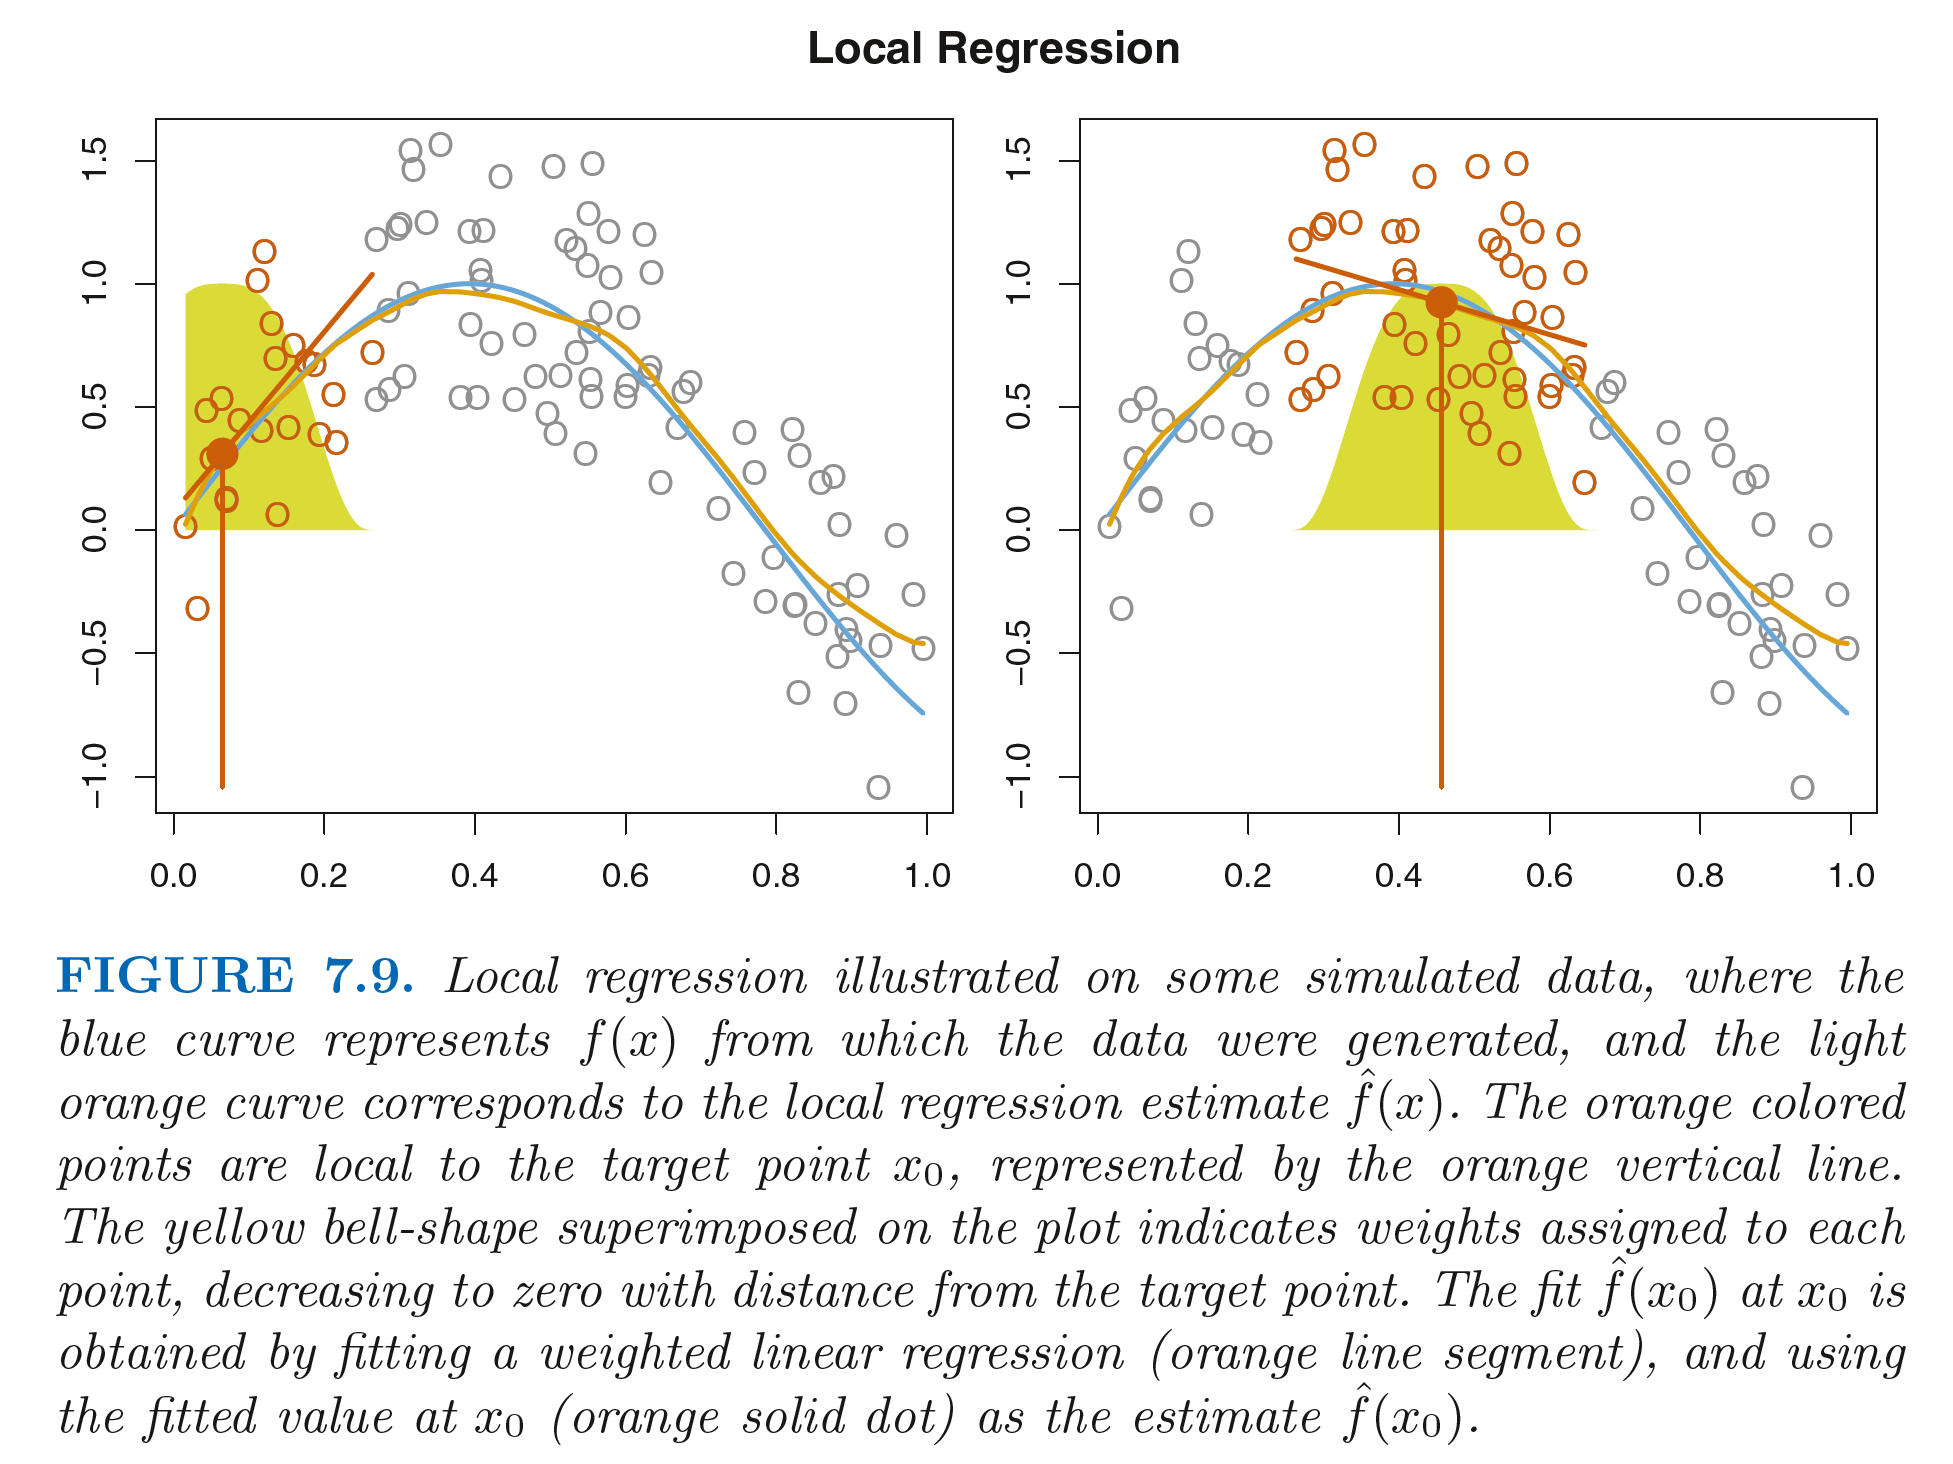

In [ ]:
Image('D:/ukm.ppt/机器学习/week4/images2/pw55.png', width =700)

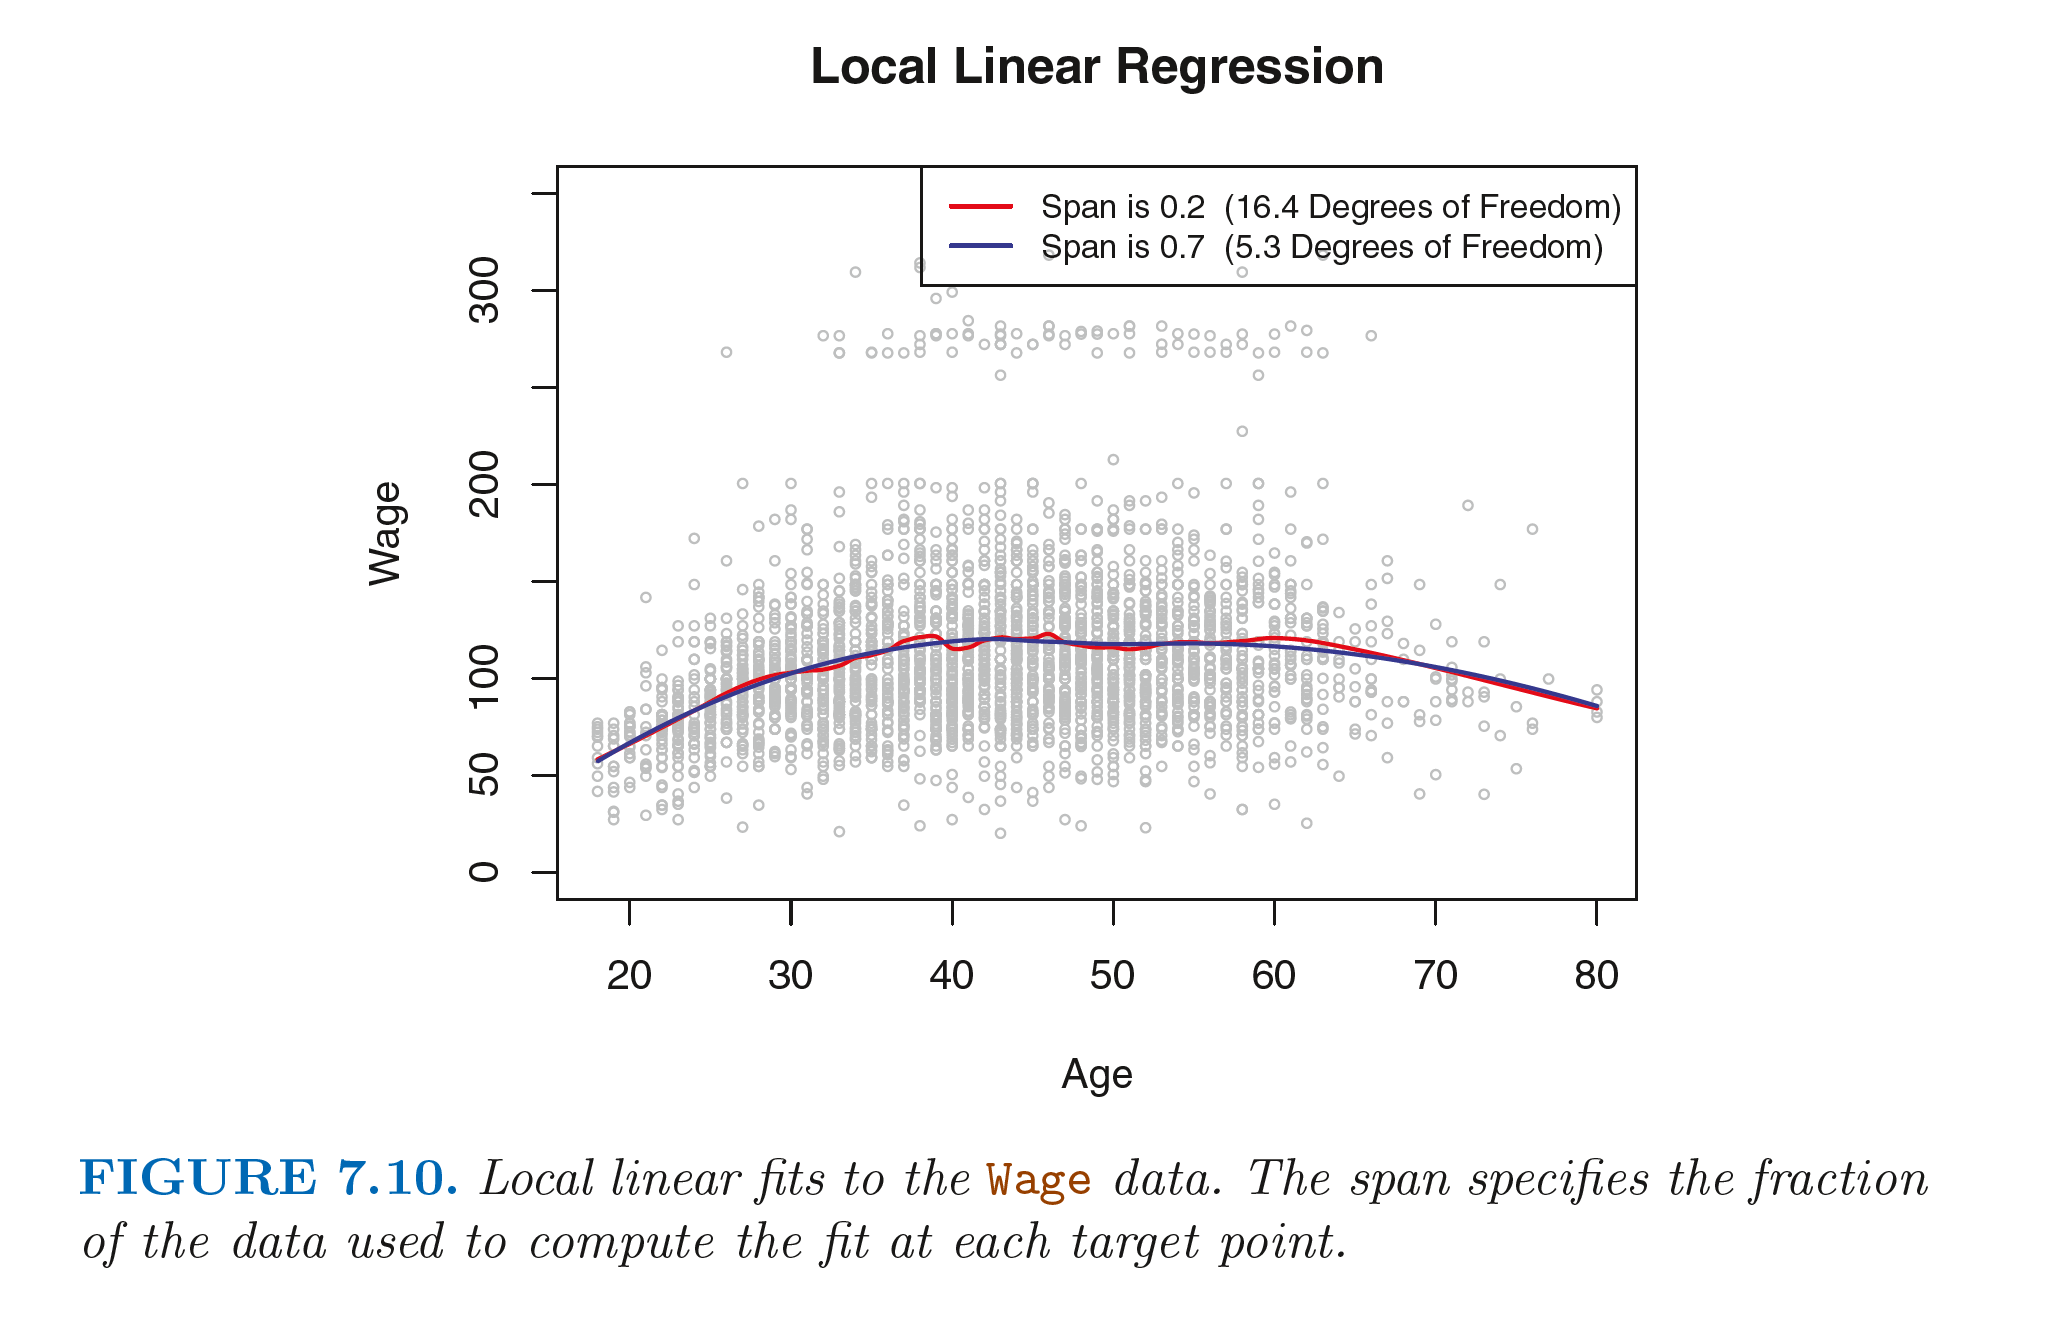

In [ ]:
Image('D:/ukm.ppt/机器学习/week4/images2/pw56.png', width =700)

## General Additive Models 

+ All the previous models all relate to single variable predictions.
+ GAMs simply add different linear models above (like the ones above) for different variables in the model, allowing for multivariate regression/classification.
+ Each variable gets its own model and is added together.
+ Each own model is a building block for a GAM.

### GAM for regression
$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip} + \epsilon_i$$
+ Replace each linear component, $\beta_j x_{ij}$, with a smooth nonlinear function, $f_j (x_{ij})$,
$$ y_i = \beta_0 + f_1(x_{i1}) + \ldots + f_p(x_{ip}) + \epsilon_i$$
+ GAM can use the previous methods as building blocks for fitting an additive model.
+ The main limitation of GAMs is that the model is restricted to be additive. With many variables, important interactions can be missed.
+ However, we can manually add interaction terms by including additional predictors of the form $X_j \times X_k$.
+ Or, we can add low-dimensional interaction functions of the form $f_{jk}(X_j,X_k)$ into the model using two-dimensional smoothers such as local regression, or two-dimensional splines.
+ The same technique can also be used for classification problems.


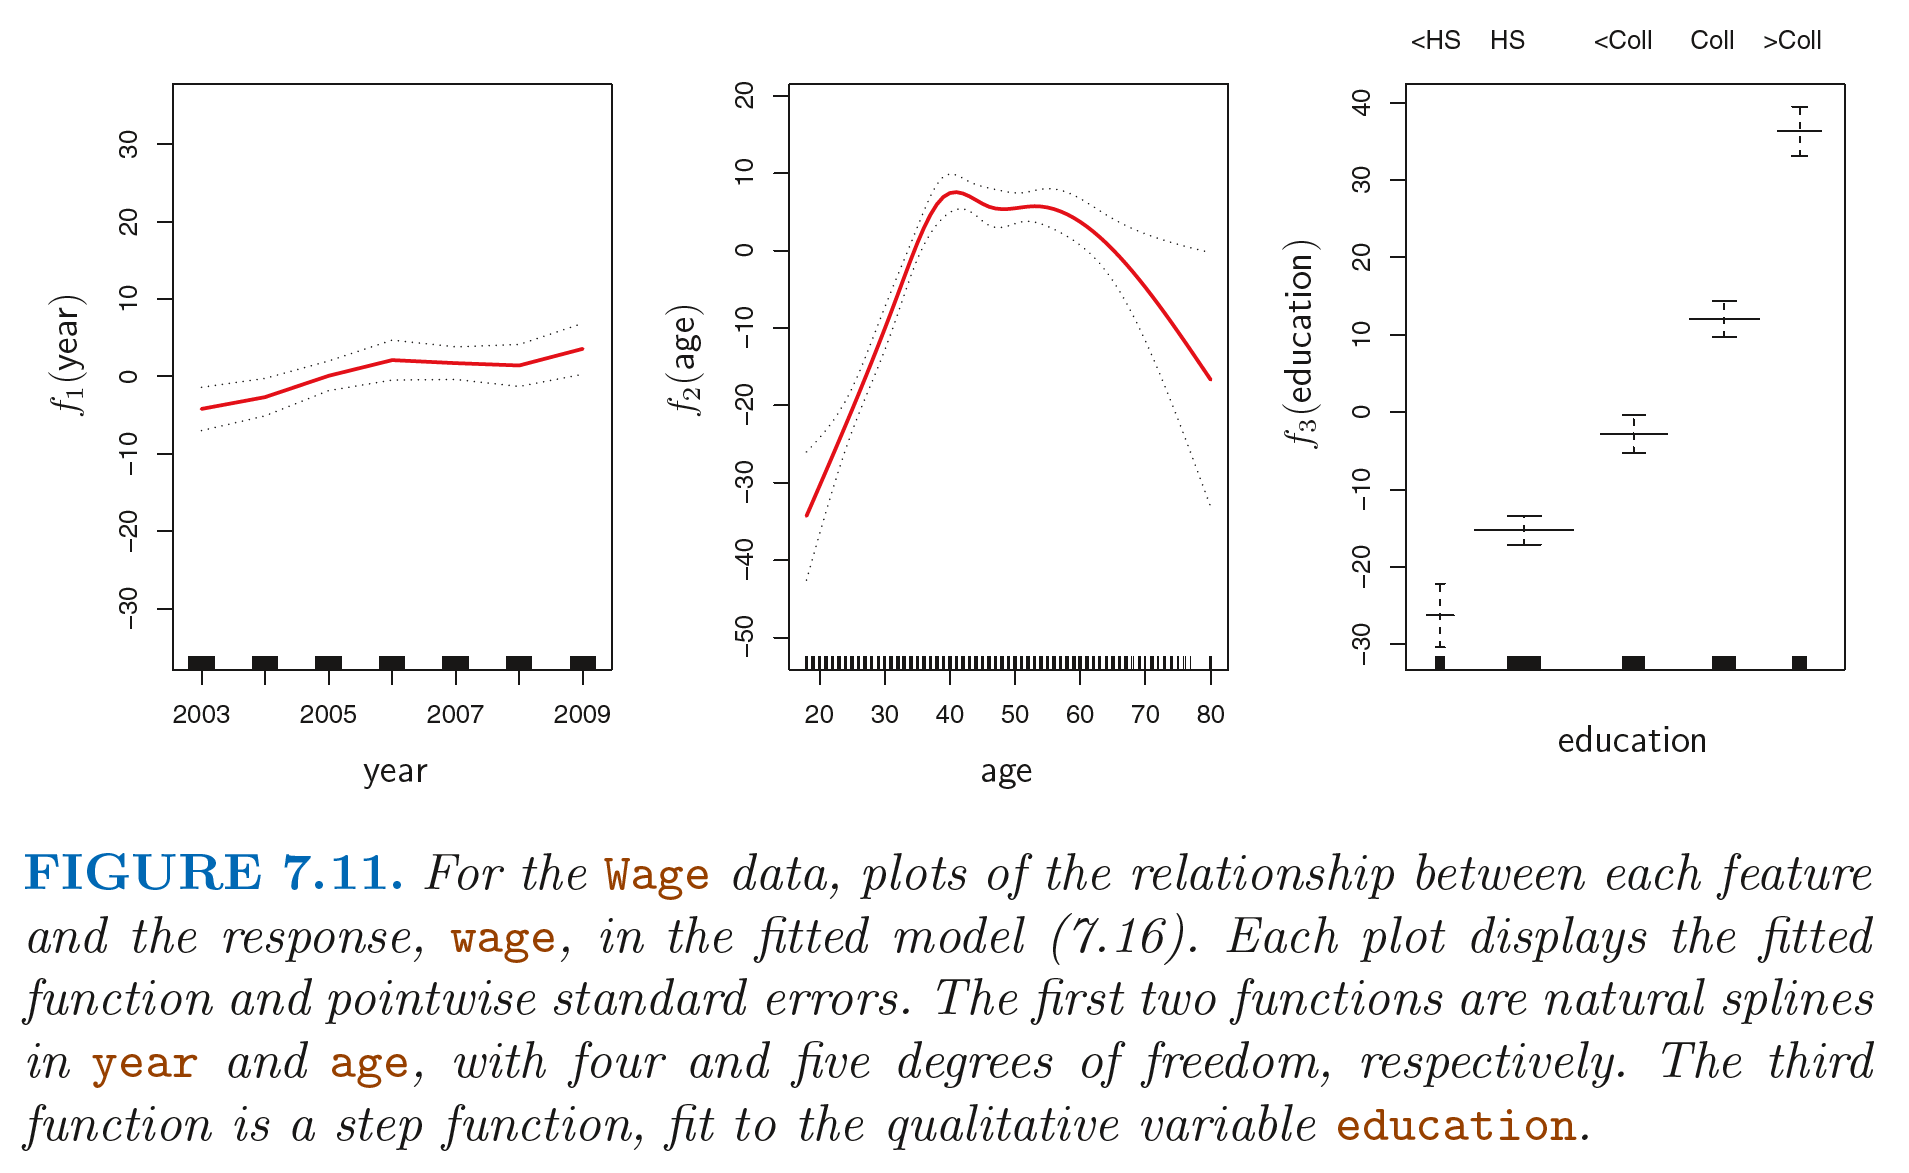

In [ ]:
Image('D:/ukm.ppt/机器学习/week4/images2/pw58.png', width =700)

# Lab 7.8.1
Recreating plot 7.1

In [4]:
import pandas as pd
import numpy as np

In [5]:
wage = pd.read_csv("D:/ukm.ppt/机器学习/week2/data/wage.csv")
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
# Use sklearn to get regression coefficients
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
poly = PolynomialFeatures(degree=4, include_bias=False)
# PolynomialFeatures 用于生成特定度数的多项式特征。
# include_bias=False 表示在生成的多项式特征中不包括这个偏置项。

In [7]:
X = wage[['age']]
y = wage['wage']

In [8]:
model = LinearRegression()

In [9]:
model.fit(poly.fit_transform(X), y)

# poly.fit_transform(X) 是使用 PolynomialFeatures 对象对数据集 X 进行多项式特征转换的方法。

LinearRegression()

In [10]:
# Coefficients are the same as in ISLR
model.intercept_, model.coef_

(-184.1541797741512,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

In [11]:
model.intercept_

-184.1541797741512

### Standard error in  Scikit-learn
Sklearn doesn't supply the standard error so you'll have to write the formula yourself or use statsmodels


In [5]:
import statsmodels.formula.api as smf

In [13]:
results = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()

# np.power() 是 numpy 库的函数，用于计算给定数的幂
# np.power(age, 2)、np.power(age, 3)、np.power(age, 4) 是模型的自变量，分别代表年龄的一次、二次、三次和四次幂。

In [14]:
results.summary()
# P 值小于常用的显著性水平（例如 0.05），则认为系数显著不为零。

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.77e-57
Time:                        09:45:05   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
results.bse # 标准误差

Intercept           60.040377
age                  5.886748
np.power(age, 2)     0.206108
np.power(age, 3)     0.003066
np.power(age, 4)     0.000016
dtype: float64

In [16]:
results.conf_int() # 计算模型中每个参数的置信区间
# 返回一个数据框，其中包含每个模型参数的置信区间的下限和上限。

,0,1
Intercept,-301.878732,-6.642963e+01
age,9.703041,3.278800e+01
"np.power(age, 2)",-0.967987,-1.597312e-01
"np.power(age, 3)",0.000799,1.282223e-02
"np.power(age, 4)",-0.000064,1.447431e-07


### Confidence interval for the mean
There are different confidence intervals for the mean (the regression line) and prediction. Prediction intervals are going to be much wider. The regression line will not wiggle around so much

In [6]:
# 获取回归模型结果的详细统计汇总，并基于这些数据进行了可视化。
from statsmodels.stats.outliers_influence import summary_table

In [18]:
st, data, ss2 = summary_table(results, alpha=0.05)
# 显著性水平 alpha=0.05，通常用于计算 95% 的置信区间。
# summary_table 返回三个对象：st（摘要对象）、data（包含预测值、置信区间等的数组）、ss2（通常未使用，但包含额外的统计信息）。

In [19]:
fittedvalues = data[:,2] # 模型的拟合值，即对每个观测点的预测响应
predict_mean_se  = data[:,3] # 每个预测值的标准误差。
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T # 预测的均值的95%置信区间的下界和上界。

In [20]:
order = np.argsort(X.values.flatten()) # np.argsort 对 X 值进行排序，确保绘图时数据点按 X 值的顺序显示。
x_o = X.values.flatten()[order]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

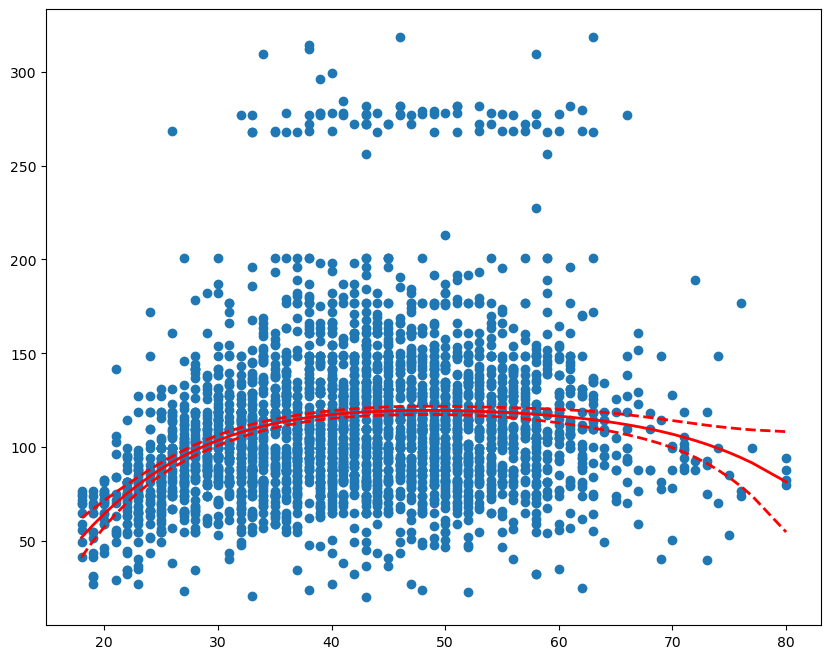

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(x_o, y[order]) # 实际观测值的散点图。
plt.plot(x_o, fittedvalues[order], 'r', lw=2)
plt.plot(x_o, predict_mean_ci_low[order], 'r--', lw=2)
plt.plot(x_o, predict_mean_ci_upp[order], 'r--', lw=2)

In [23]:
# Which features are necessary
smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.77e-57
Time:                        09:53:05   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Use Anova to test wheter each additional polynomial term is significant
Models must be nested here, meaning that mod2 must be a superset of mod1

In [24]:
from statsmodels.stats.api import anova_lm # ANOVA

In [25]:
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()

In [26]:
# Same as ISLR
# polynomial terms 4 and 5 are not needed. p > .05
anova_lm(mod1, mod2, mod3, mod4, mod5)
# 方差分析，测试增加更多年龄的高次项是否显著提高了模型的解释力。
# 从一个模型到下一个模型的 F-统计值显著（通常对应的 p 值小于 0.05），
# 则意味着新加入的变量（如更高次的年龄项）提供了额外的重要信息，使得模型更好地解释了工资变化。

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


# Logistic regression
Prediciton of greater than 250k in income

In [27]:
wage['wage_250'] = (wage['wage'] > 250) * 1

In [28]:
results = smf.logit('wage_250 ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                 0.04013
Time:                        10:10:35   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age                  8.9950      4.187      2.148      0.032       0.789      17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037      -0.547      -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043       0.000       0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
====================================================================================
"""

In [30]:
y_hat = np.exp(results.fittedvalues)
# results.fittedvalues 得到的是拟合模型的对数预测值，因为模型可能是对数线性的。
# np.exp(results.fittedvalues) 转换这些值回原始的比例尺度上。
y = wage['wage_250'].values
x = X['age'].values
x_mean = x.mean()
n = len(y)

In [31]:
sy = np.sqrt(np.sum((y - y_hat)**2) / (n - 2)) # 计算预测误差的标准偏差
sx = np.sum((x - x_mean) ** 2) / n # 计算 x 的方差，方差通常是用总平方偏差除以 n−1
x_s = (x - x_mean) ** 2 # 计算每个年龄值相对平均值的平方差

In [32]:
sx = np.sum(x ** 2) - (x.sum() ** 2) / n # 计算 x 的方差

In [33]:
err = sy * np.sqrt(1/n + x_s / x_s.sum()) # 计算误差估计的调整

In [34]:
order = np.argsort(x) # 返回一个数组，包含 x 值从小到大排序的索引。
x_o = x[order]

(0.0, 0.07)

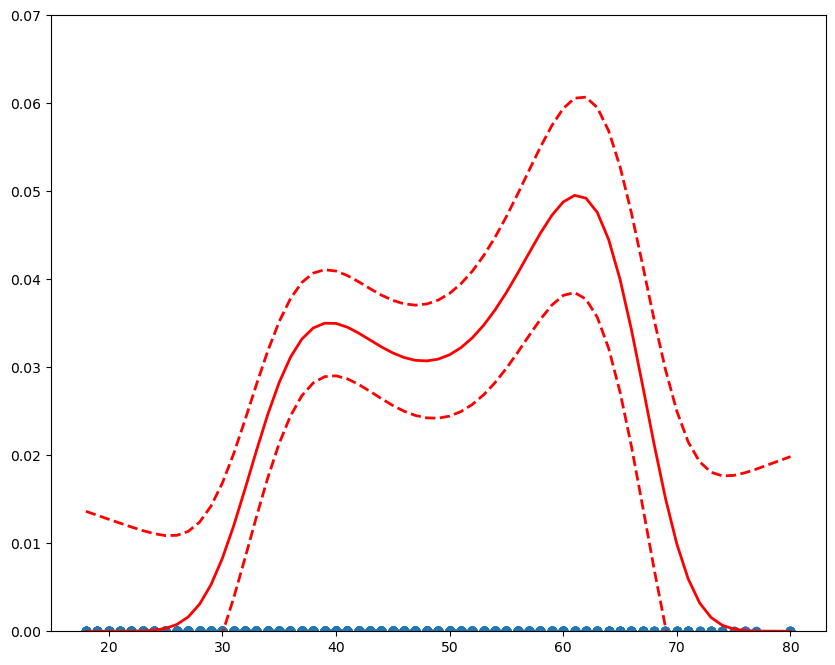

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(x_o, y[order])
plt.plot(x_o, y_hat[order], 'r', lw=2)
plt.plot(x_o, y_hat[order] + 2 * err[order], 'r--', lw=2)
plt.plot(x_o, y_hat[order] - 2 * err[order], 'r--', lw=2)
plt.ylim(0, .07)

# Step function as in 7.2
use pd.cut

In [36]:
results = smf.ols('wage ~ pd.cut(age, 4)', data=wage).fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.13e-41
Time:                        10:19:31   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 94.1584      1.476     63.790      0.000      91.264      97.053
pd.cut(age, 4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
pd.cut(age, 4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
pd.cut(age, 4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splines 

In [8]:
import scipy.interpolate as si

In [39]:
y = wage['wage'].values

In [40]:
order = np.argsort(x)

In [41]:
x_sort = x[order]
y_sort = y[order]
t = np.array([25, 40, 60]) #定义结点

In [42]:
spl = si.LSQUnivariateSpline(x_sort, y_sort, t)
# LSQUnivariateSpline 是一个用于拟合一维最小二乘样条的函数。
#t 是传入的结点数组，指定了样条函数在哪些点需要特别处理。

In [43]:
spl(x_sort) # 使用样条进行预测

array([60.49371419, 60.49371419, 60.49371419, ..., 77.09985645,
       77.09985645, 77.09985645])

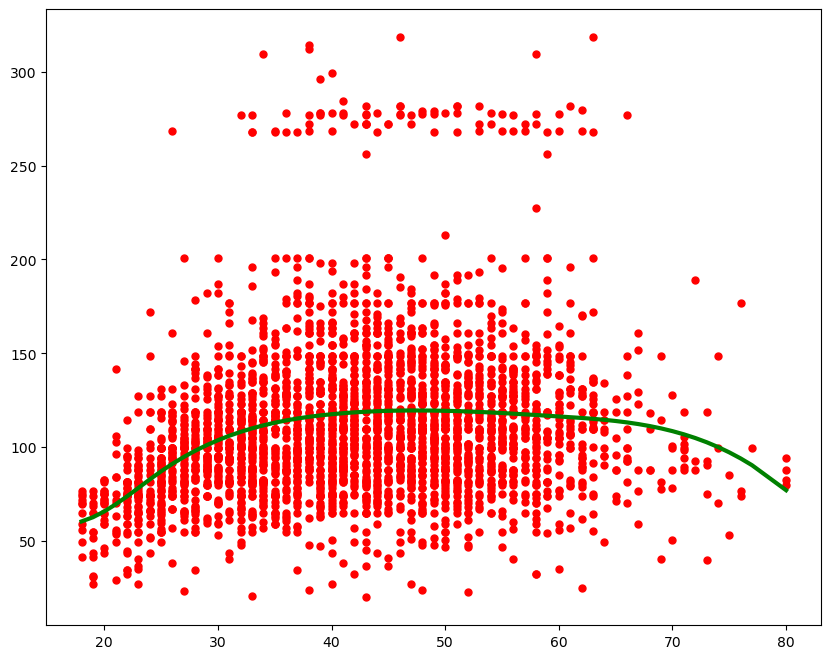

In [44]:
plt.figure(figsize=(10,8))
plt.plot(x_sort, y_sort, 'ro', ms=5)
plt.plot(x_sort, spl(x_sort), 'g-', lw=3);

## General additive models for classification 


In [ ]:
pip install pygam --user


Note: you may need to restart the kernel to use updated packages.


This data contains 569 observations and 30 features. The target variable in this case is whether the tumor of malignant or benign, and the features are several measurements of the tumor. For showcasing purposes, we keep the first 6 features only.

In [ ]:
import pandas as pd
from pygam import LogisticGAM
from sklearn.datasets import load_breast_cancer

#load the breast cancer data set
data = load_breast_cancer()

#keep first 6 features only
df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
# data.data（假设是一个包含数据的 NumPy 数组）转换成一个 pandas 数据框架。
# data.feature_names 用作列名，它是一个字符串列表，指定了每列数据的名称。
target_df = pd.Series(data.target) # data.target 转换成了一个 pandas 数据系列 target_df
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


Since this is a classification problem, make sure to use pyGam’s LogisticGAM() function.

In [ ]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df

#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)
# 广义相加模型用于逻辑回归分析

In [ ]:
gam.summary()
# Lambda: 惩罚项的强度，这里每个都是 [0.6]，控制平滑程度的参数。
# Rank: 平滑函数的基的数量，这里每个都是20。
# EDoF (Effective Degrees of Freedom): 每个平滑项的有效自由度，显示每个平滑项的复杂性。
# Sig. Code: 显著性编码，*** 表示非常显著（p < 0.001），** 表示显著（p < 0.01），* 表示边缘显著（p < 0.05）。

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.4476
Link Function:                        LogitLink Log Likelihood:                                   -54.0256
Number of Samples:                          569 AIC:                                              146.9464
                                                AICc:                                             148.5483
                                                UBRE:                                               2.2856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8562
Feature Function                  Lam

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22076\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
gam.accuracy(X, y)

0.9560632688927944

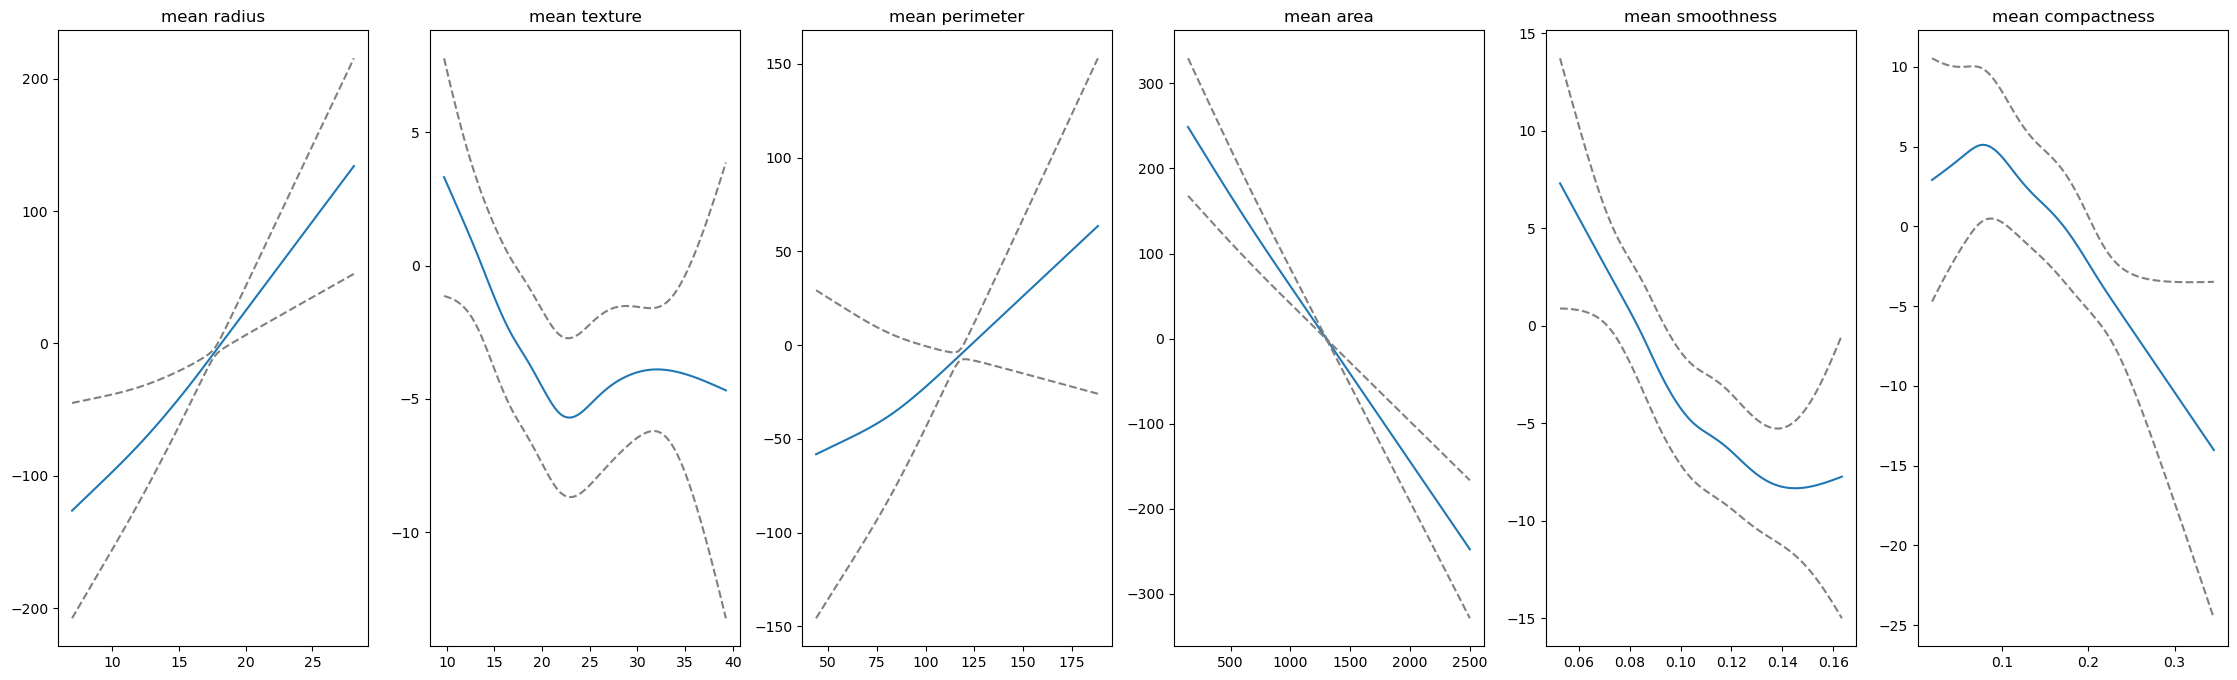

In [ ]:
# 展示 LogisticGAM 模型中每个特征与响应变量之间的关系。
plt.rcParams['figure.figsize'] = (28, 8) # 绘图的全局参数
fig, axs = plt.subplots(1, len(data.feature_names[0:6])) # plt.subplots 创建一个图形和子图数组
titles = data.feature_names
# 遍历特征绘图
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i) # gam.generate_X_grid(term=i) 生成第 i 个特征的值的网格
    pdep, confi = gam.partial_dependence(term=i, width=.95) # 计算给定特征的部分依赖性及其95%的置信区间
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[:, 0], c='grey', ls='--') #下届
    ax.plot(XX[:, i], confi[:, 1], c='grey', ls='--') #上届
    ax.set_title(titles[i])
plt.show()

### GAM for regression 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


<Figure size 2800x800 with 0 Axes>

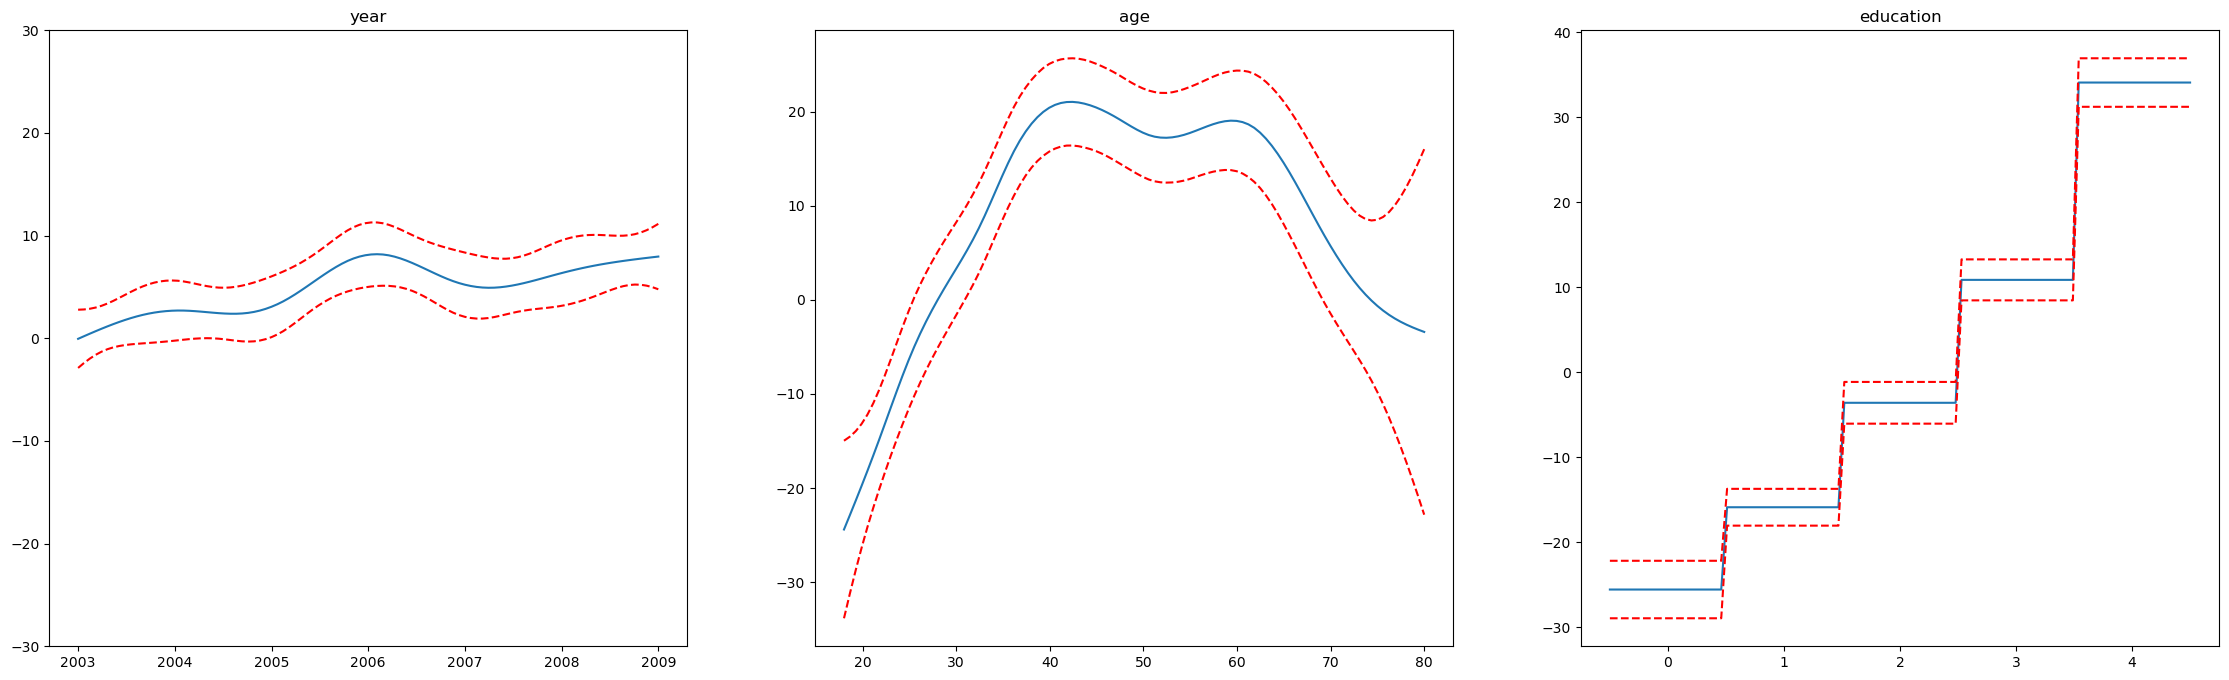

In [ ]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True) # return_X_y，当设置为 True 时，这个函数将返回特征矩阵 X 和目标向量 y。

## model
gam = LinearGAM(s(0) + s(1) + f(2))
# LinearGAM: 这是 pyGAM 库中用于拟合线性广义相加模型的类。
# s(0) 和 s(1) 表示对第一个和第二个特征使用平滑函数（默认使用样条平滑），
# 而 f(2) 表示对第三个特征使用一个因子平滑，通常用于分类变量。

gam.gridsearch(X, y)
# gridsearch: 这是 pyGAM 中的一个方法，用于自动进行网格搜索，以找到最佳的平滑参数。


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i) # gam.generate_X_grid(term=i) 为第 i 个特征生成数据网格。
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22076\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


More on this: https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Functional-Form:

# KNN Regression

https://towardsdatascience.com/the-basics-knn-for-classification-and-regression-c1e8a6c955

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wage = pd.read_csv("D:/ukm.ppt/机器学习/week2/data/wage.csv")

from sklearn.model_selection import train_test_split
train , test = train_test_split(wage, test_size = 0.3)

X_train = train[['age']]
y_train = train['wage']
X_test = test[['age']]
y_test = test['wage']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=9) # 邻居的数量为 9
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
y_pred_knn=knn.predict(X_test)


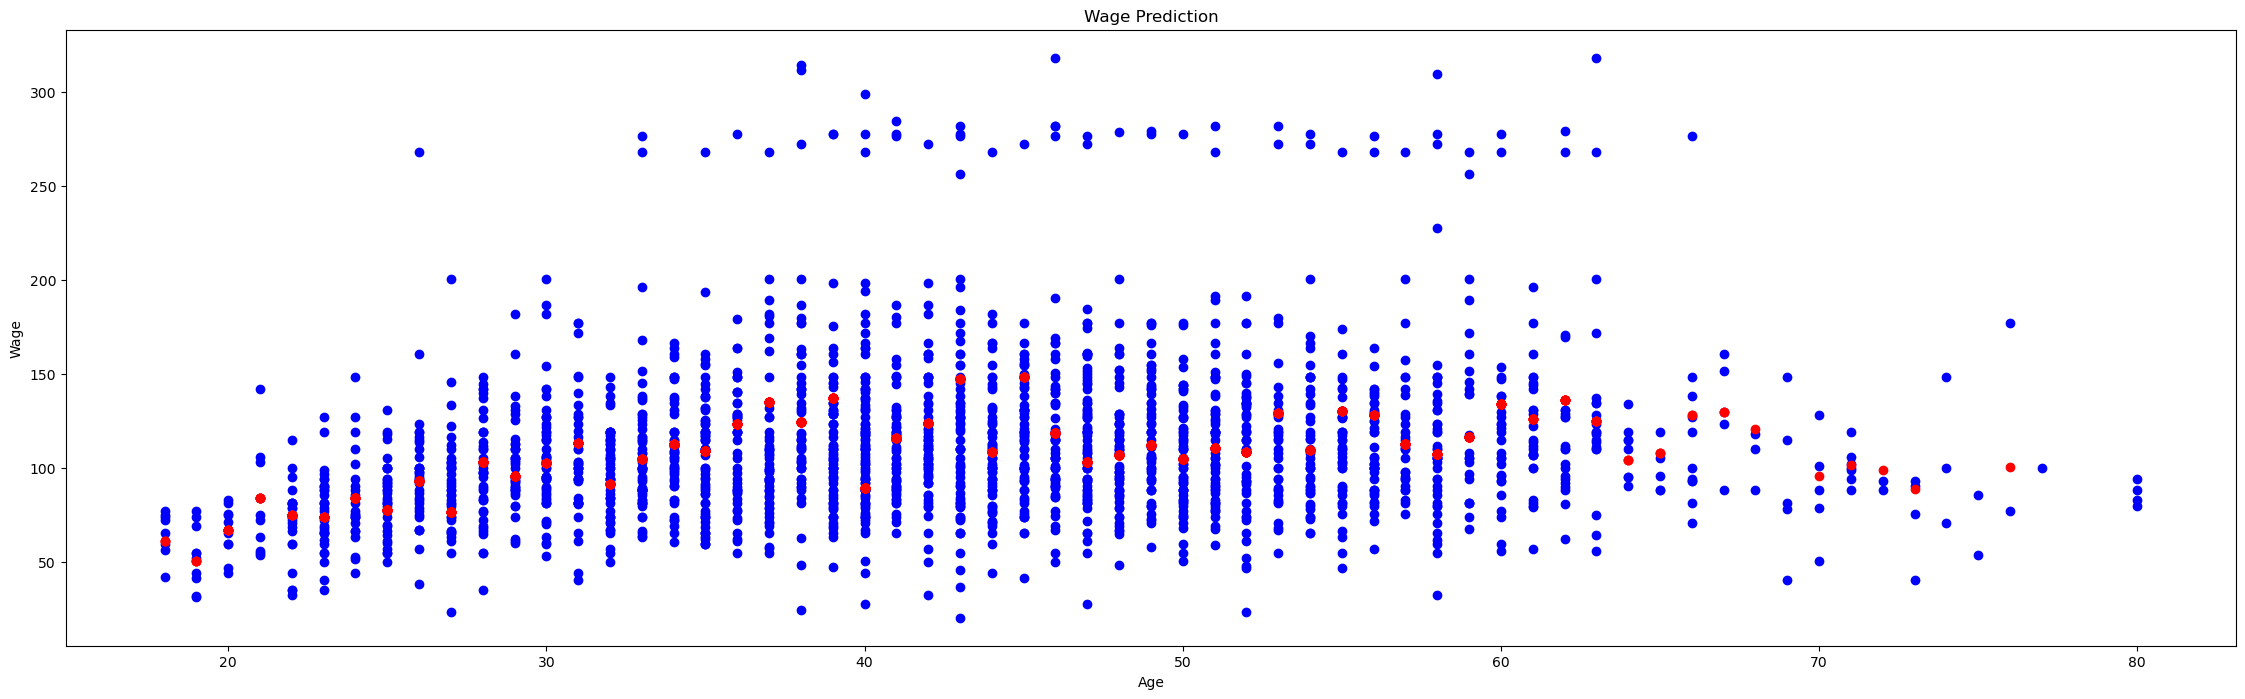

In [ ]:
plt.scatter(X_train,y_train,color="blue")
plt.scatter(X_test,knn.predict(X_test),color="red")
plt.title("Wage Prediction")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

# 遍历不同的 k 值来实现一个 k-最近邻（k-NN）回归模型的性能评估
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    # mean_squared_error(y_test, pred) 计算预测值 pred 和真实值 y_test 之间的均方误差（MSE）。
    # sqrt(...) 计算 MSE 的平方根，得到均方根误差（RMSE），这是一个常用的评价回归模型性能的指标，越小越好。
    rmse_val.append(error) #store rmse values
    print("RMSE value for k= " , K , "is:", error)

<Axes: >

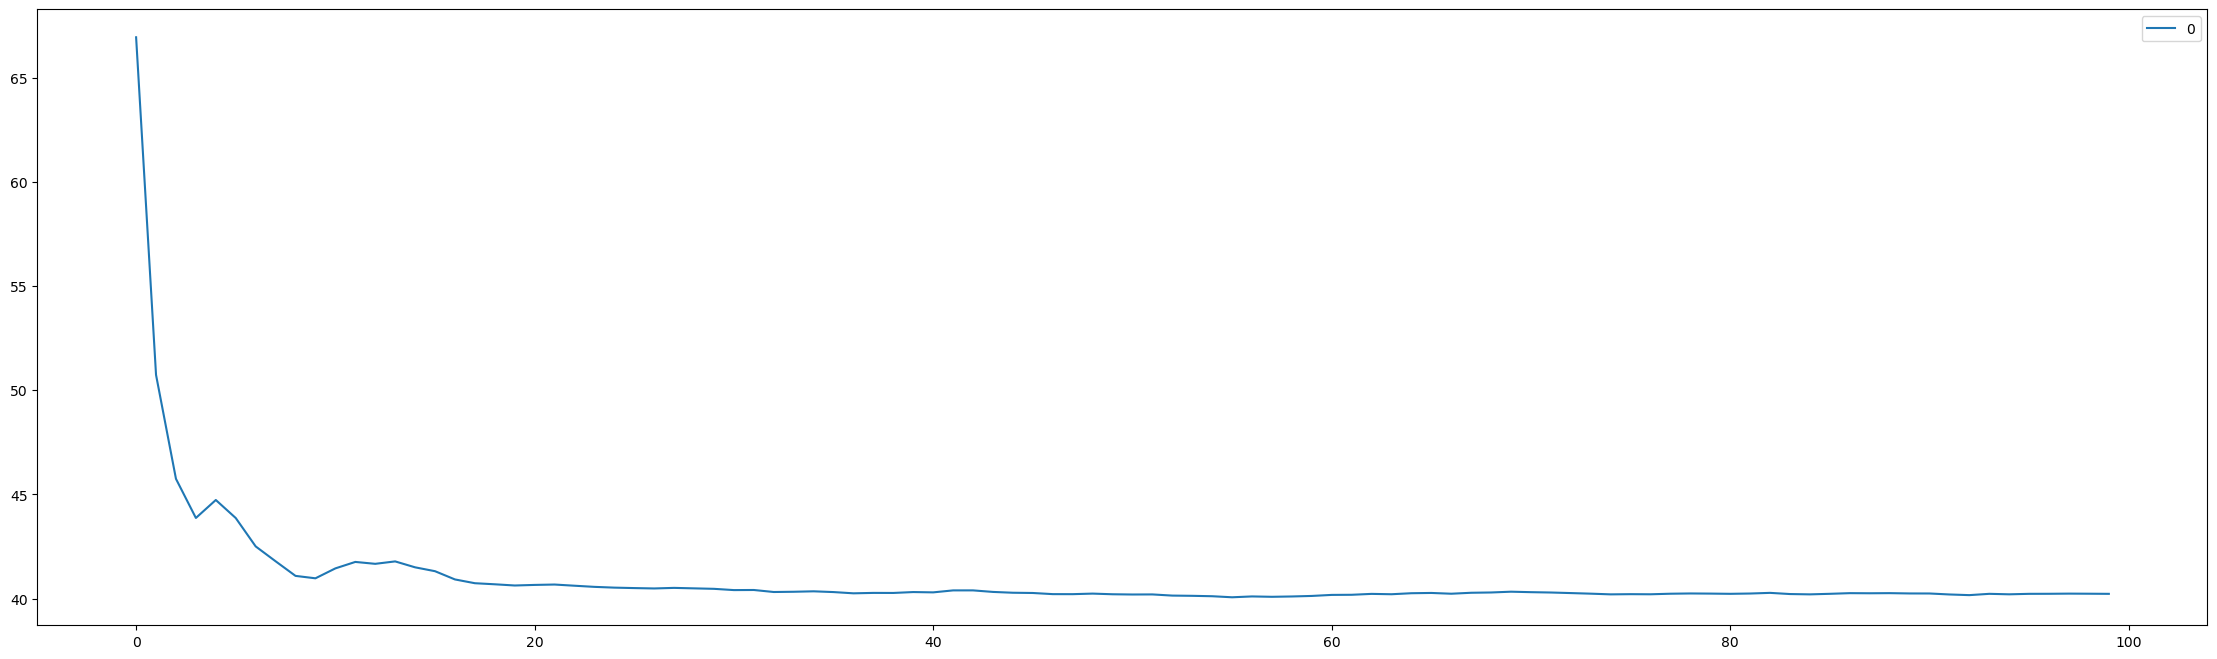

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV # 尝试一系列的 k 值并使用交叉验证来评估每个 k 值的性能，从而选择最佳参数。
params = {"n_neighbors":list(range(1,100))}
# params 是一个字典，其中 "n_neighbors" 是要调整的参数
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
# 创建一个 GridSearchCV 对象，其中 knn 是 k-最近邻模型，params 是参数字典，cv=5 表示使用 5 折交叉验证。
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 99}

# KNN Classifier

In [45]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max() #对特征数据进行归一化处理，确保所有特征值都在 0 到 1 之间。

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]#使用 90% 的数据作为训练集，剩余 10% 的数据作为测试集。
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier() # 默认情况下，n_neighbors=5（即考虑最近的5个邻居）。
logistic = linear_model.LogisticRegression(max_iter=1000) #max_iter=1000 设置算法的最大迭代次数，以确保收敛。

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


# Exercises

# 1 Cubic Spline regression 
a) Since x < $\xi$ then $a_1 = \beta_0$ and $b_1 = \beta_1$ and $c_1 = \beta_2$ and $d_1 = \beta_3$

b) Must expand expression and group like polynomial terms. $a_1 = \beta_0 - \beta_4\xi^3$ and $b_1 = \beta_1 + \beta_4\xi^2$ and $c_1 = \beta_2 - 3\beta_4\xi$ and $d_1 = \beta_3 + \beta_4$

c) when $x=\xi$ the spline term equals 0 for both equations and thus they are equal

d, e) If they are equal then their derivatives must also be equal

# 2
a) g = 0  
b) g = mean(y)  
c) g = linear regression with 2 parameters - slope and intercept  
d) g = cubic term in regression with 3 parameters  
e) g = very high dimensional function that gives nearly 0 training error  

# 3

In [47]:
x = np.linspace(-2, 2, 100)

In [48]:
y = 1 + x + -2 * (x - 1) ** 2 * (x >= 1)

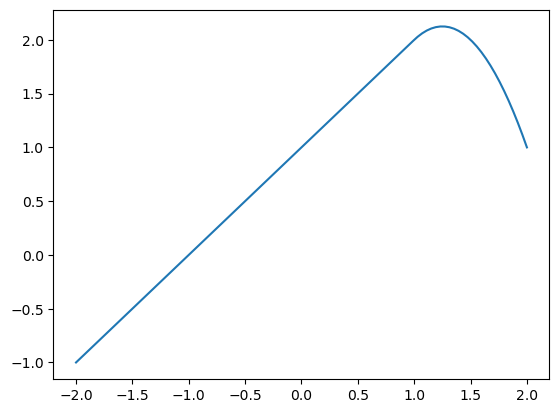

In [49]:
plt.plot(x, y)

# 4

In [50]:
b1_1 = (0 <= x) & (x <= 2)
b1_2 = (1 <= x) & (x <= 2)
b2_1 = (3 <= x) & (x <= 4)
b2_2 = (4 < x) & (x <= 5)

In [51]:
y = 1 + b1_1 - (x - 1) * b1_2 + (x - 3) * b2_1 + b2_2

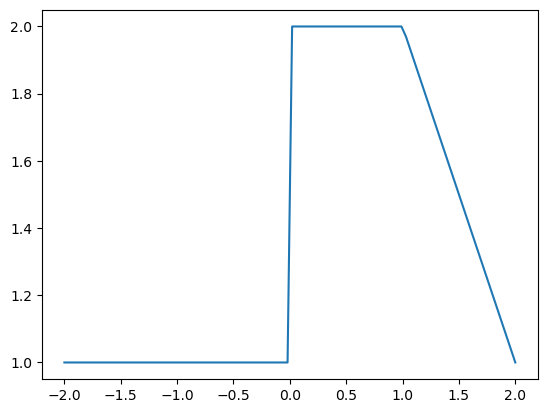

In [52]:
plt.plot(x, y)

# 5
a) g2 will have smaller training error, since it is allowing more flexibility, can have up to a cubic model. g1 will be limited to a quadratic model as $\lambda$ approaches infinity

b) Can't tell which model will have smaller test error this depends on the 'true' relationship between x and y.

c) g1 and g2 will be the same model if there is no penalty

# 6

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [54]:
# 简单的线性回归模型中逐步增加多项式特征的程度，并利用交叉验证来评估每个模型的性能。
degrees = range(1, 11)
X = wage[['age']]
y = wage['wage']
final_scores = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False) #  include_bias=False 意味着不生成偏置项（常数项）。
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    scores = model_selection.cross_val_score(pipeline, # 执行交叉验证来评估当前的多项式模型。这里使用了 10 折交叉验证
                                            X, y, cv=10, scoring='neg_mean_squared_error')
    # cross_val_score交叉验证
    final_scores.append(-np.mean(scores))

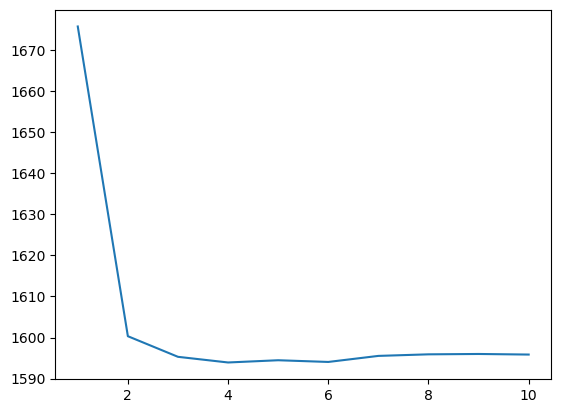

In [55]:
# degree 3 chosen through 10-fold CV
plt.plot(degrees, final_scores);

In [56]:
# compare to anova: already done above. More evidence that 4th and 5th degree polynomial are not needed
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()
anova_lm(mod1, mod2, mod3, mod4, mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [57]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
linear_regression.fit(polynomial_features.fit_transform(X), y)

LinearRegression()

In [58]:
x = np.linspace(X.values.min(), X.values.max(), 1000) # 在指定的间隔内生成等距的数字。

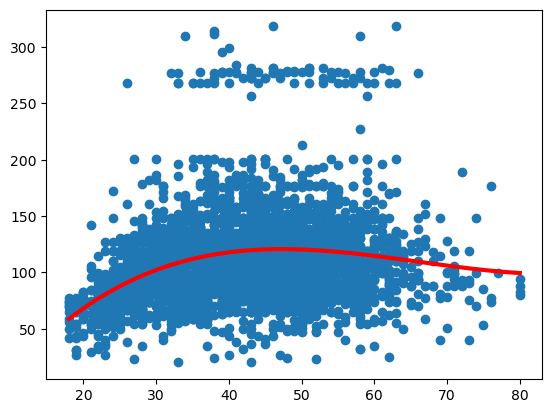

In [59]:
plt.scatter(X, y)
plt.plot(x, linear_regression.predict(polynomial_features.fit_transform(x.reshape(-1, 1))), c='r', lw=3);

In [60]:
# 分段
cuts = range(1, 41)
X = wage[['age']]
y = wage['wage']
final_scores = []
for cut in cuts:
    X_new = pd.get_dummies(pd.cut(X['age'], cut)).values # cut 函数将 age 列的数据分成 cut 个箱。
    # pd.get_dummies(...)：对分箱后的结果进行 one-hot 编码。每个箱会被转换为一个指示变量（0或1），表示原始数据落在哪个箱中。

    linear_regression = LinearRegression(fit_intercept=False)

    scores = model_selection.cross_val_score(linear_regression, X_new, y, cv=10, scoring='neg_mean_squared_error')
    final_scores.append(-np.mean(scores))

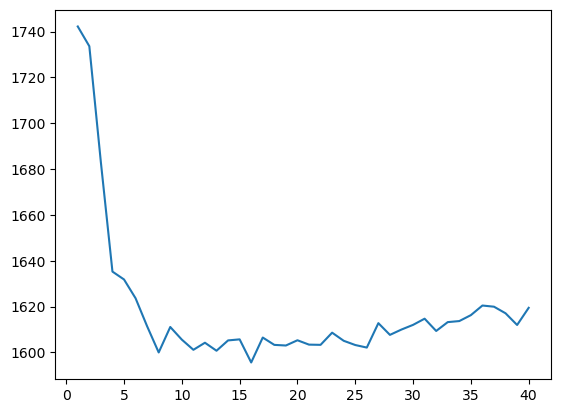

In [61]:
# looks like error stops getting better after 7 cuts
plt.plot(cuts, final_scores);

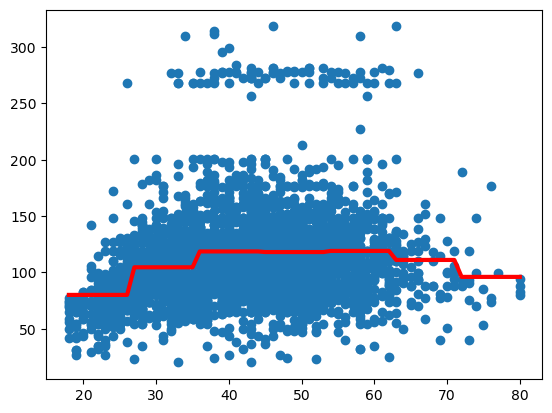

In [65]:
X_new = pd.get_dummies(pd.cut(X['age'], 7)).values
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(X_new, y)
plt.scatter(X, y)
order = np.argsort(X['age']) # np.argsort(array) 返回的是数组值从小到大的索引数组。
plt.plot(X['age'].values[order], linear_regression.predict(X_new[order]), c='r', lw=3);

# 7

In [10]:
wage = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/wage.csv')

In [11]:
wage[['maritl', 'jobclass']].head()

,maritl,jobclass
0,1. Never Married,1. Industrial
1,1. Never Married,2. Information
2,2. Married,1. Industrial
3,2. Married,2. Information
4,4. Divorced,2. Information


In [12]:
X = pd.get_dummies(wage[['maritl', 'jobclass']], drop_first=False)
# 将分类数据转换为哑变量或独热编码形式的函数。
y = wage['wage']

In [67]:
X.head()

,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,jobclass_1. Industrial,jobclass_2. Information
0,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True
2,False,True,False,False,False,True,False
3,False,True,False,False,False,False,True
4,False,False,False,True,False,False,True


In [13]:
linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression()

In [69]:
linear_regression.coef_

array([-10.06914129,  15.28671515,  -1.93249277,  -0.40498993,
        -2.88009116,  -8.2615753 ,   8.2615753 ])

In [70]:
linear_regression.intercept_

103.64524662926692

In [14]:
import statsmodels.api as sm
import pandas as pd

In [29]:
X = X.astype(float)
y = y.astype(float)
print(X.dtypes)
print(y.dtypes)

1. Never Married 1. Industrial     float64
1. Never Married 2. Information    float64
2. Married 1. Industrial           float64
2. Married 2. Information          float64
3. Widowed 1. Industrial           float64
3. Widowed 2. Information          float64
4. Divorced 1. Industrial          float64
4. Divorced 2. Information         float64
5. Separated 1. Industrial         float64
5. Separated 2. Information        float64
dtype: object
float64


In [30]:
X = sm.add_constant(X) # 添加截距项，在没有截距的模型中，线性关系必须通过原点
results_orig = sm.OLS(y, X).fit()
results_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     40.91
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.97e-69
Time:                        11:03:21   Log-Likelihood:                -15276.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2990   BIC:                         3.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              93.8178      2.050     45.772      0.000      89.799      97.837
1. Never Married 1. Industrial     -9.1864      2.787     -3.297      0.001     -14.650      -3.723
1. Never Married 2. Information     8.8580      2.928      3.025      0.003       3.117      14.599
2. Married 1. Industrial           16.7037      2.328      7.176      0.000      12.140      21.268
2. Married 2. Information          33.5272      2.332     14.376      0.000      28.954      38.100
3. Widowed 1. Industrial            7.1381     10.499      0.680      0.497     -13.448      27.724
3. Widowed 2. Information           3.2913     13.637      0.241      0.809     -23.447      30.029
4. Divorced 1. Industrial           2.2904      4.069      0.563      0.574      -5.687      10.268
4. Divorced 2. Information         16.5322      4.099      4.034      0.000       8.496      24.568
5. Separated 1. Industrial          6.1163      7.289      0.839      0.401      -8.176      20.409
5. Separated 2. Information         8.5471      6.933      1.233      0.218      -5.048      22.142
==============================================================================
Omnibus:                     1050.722   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.814
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                     1.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# 计算特定子群体的平均工资
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()
# 同时满足这两个条件

97.10906713345983

In [20]:
wage[wage['maritl'] == '1. Never Married']['wage'].mean()

92.73464859222042

In [21]:
wage[wage['jobclass'] == '1. Industrial']['wage'].mean()

103.32112881497476

In [22]:
wage[wage['jobclass'] == '2. Information']['wage'].mean()

120.59272095804215

In [23]:
wage['jobclass'].value_counts()

jobclass
1. Industrial     1544
2. Information    1456
Name: count, dtype: int64

In [24]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [25]:
27.6 + 82.3

109.9

In [26]:
X = pd.get_dummies(wage['maritl'] + ' ' + wage['jobclass'])
# + 操作符被用来将 maritl 列和 jobclass 列的字符串值连接起来，中间插入一个空格。
y = wage['wage']

In [32]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     40.91
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.97e-69
Time:                        11:03:37   Log-Likelihood:                -15276.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2990   BIC:                         3.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              93.8178      2.050     45.772      0.000      89.799      97.837
1. Never Married 1. Industrial     -9.1864      2.787     -3.297      0.001     -14.650      -3.723
1. Never Married 2. Information     8.8580      2.928      3.025      0.003       3.117      14.599
2. Married 1. Industrial           16.7037      2.328      7.176      0.000      12.140      21.268
2. Married 2. Information          33.5272      2.332     14.376      0.000      28.954      38.100
3. Widowed 1. Industrial            7.1381     10.499      0.680      0.497     -13.448      27.724
3. Widowed 2. Information           3.2913     13.637      0.241      0.809     -23.447      30.029
4. Divorced 1. Industrial           2.2904      4.069      0.563      0.574      -5.687      10.268
4. Divorced 2. Information         16.5322      4.099      4.034      0.000       8.496      24.568
5. Separated 1. Industrial          6.1163      7.289      0.839      0.401      -8.176      20.409
5. Separated 2. Information         8.5471      6.933      1.233      0.218      -5.048      22.142
==============================================================================
Omnibus:                     1050.722   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.814
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                     1.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [35]:
results.predict([0, 0, 0, 0, 0, 0, 0, 1, 0, 0,0])

array([2.29039189])

In [39]:
results_orig.predict([0, 0, 0, 1, 0, 1, 0,0,0,1,0])

array([29.95814878])